## Problem Statement
This research aims to develop a novel approach for credit scoring by leveraging social media data to predict potential defaulters and assess financial risk. The study will address the challenge by early prediction of defaulters by analyzing user portfolios, including profile behavior, investment patterns, and financial planning and investment. Additionally, the research will also focus on identifying dependent and independent factors/attributes along with mitigating biases related to social profile indicators, such as demographics and professional qualifications etc., to ensure fairness in credit assignment. The final goal is to identify key factors and social network metrics to propose an improved method for predicting credit scores, particularly for portfolio assessment related to potential bankruptcy risk related loan approval.



## Supervised Learning
Before we dive into Classification, let’s take a look at what Supervised Learning is. Suppose you are trying to learn a new concept in maths and after solving a problem, you may refer to the solutions to see if you were right or not. Once you are confident in your ability to solve a particular type of problem, you will stop referring to the answers and solve the questions put before you by yourself.

<img src=https://www.researchgate.net/publication/342761996/figure/fig3/AS:926550690123778@1597918307514/Examples-of-Supervised-Learning-Linear-Regression-and-Unsupervised-Learning.png width=600/>

This is also how Supervised Learning works with machine learning models. In Supervised Learning, the model learns by example. Along with our input variable, we also give our model the corresponding correct labels. While training, the model gets to look at which label corresponds to our data and hence can find patterns between our data and those labels.

Some examples of Supervised Learning include:

* It classifies spam Detection by teaching a model of what mail is spam and not spam.
* Speech recognition where you teach a machine to recognize your voice.
* Object Recognition by showing a machine what an object looks like and having it pick that object from among other objects.


## Classification Problems

Classification is defined as the process of recognition, understanding, and grouping of objects and ideas into preset categories a.k.a “sub-populations.” With the help of these pre-categorized training datasets, classification in machine learning programs leverage a wide range of algorithms to classify future datasets into respective and relevant categories.

Classification algorithms used in machine learning utilize input training data for the purpose of predicting the likelihood or probability that the data that follows will fall into one of the predetermined categories. One of the most common applications of classification is for filtering emails into “spam” or “non-spam”, as used by today’s top email service providers.

## Classification Algorithms

Based on training data, the Classification algorithm is a Supervised Learning technique used to categorize new observations. In classification, a program uses the dataset or observations provided to learn how to categorize new observations into various classes or groups. For instance, 0 or 1, red or blue, yes or no, spam or not spam, etc. Targets, labels, or categories can all be used to describe classes. The Classification algorithm uses labeled input data because it is a supervised learning technique and comprises input and output information. A discrete output function (y) is transferred to an input variable in the classification process (x).

## Types of Learners

### Lazy Learners

It first stores the training dataset before waiting for the test dataset to arrive. When using a lazy learner, the classification is carried out using the training dataset's most appropriate data. Less time is spent on training, but more time is spent on predictions. Some of the examples are case-based reasoning and the KNN algorithm.

### Eager Learners

Before obtaining a test dataset, eager learners build a classification model using a training dataset. They spend more time studying and less time predicting. Some of the examples are ANN, naive Bayes, and Decision trees.

### Importing necessary Libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from keras.regularizers import l2
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn .metrics import accuracy_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor


pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline

## EDA & Data Preprocessing

<b>Exploratory Data Analysis</b>, or EDA, is an important step in any Data Analysis or Data Science project. EDA is the process of investigating the dataset to discover patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset.



EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better. In this article, we will understand EDA with the help of an example dataset. We will use Python language (Pandas library) for this purpose.


<b>Data preprocessing</b>, a component of data preparation, describes any type of processing performed on raw data to prepare it for another data processing procedure. It has traditionally been an important preliminary step for the data mining process. More recently, data preprocessing techniques have been adapted for training machine learning models and AI models and for running inferences against them.


Data preprocessing transforms the data into a format that is more easily and effectively processed in data mining, machine learning and other data science tasks. The techniques are generally used at the earliest stages of the machine learning and AI development pipeline to ensure accurate results.

There are several different tools and methods used for preprocessing data, including the following

* sampling, which selects a representative subset from a large population of data.
* transformation, which manipulates raw data to produce a single input.
* denoising, which removes noise from data.
* imputation, which synthesizes statistically relevant data for missing values.
* normalization, which organizes data for more efficient access.
* feature extraction, which pulls out a relevant feature subset that is significant in a particular context.

### Loading and Exploring Data

In [2]:
df = pd.read_csv("train.csv")
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


### Dropping irrelevant features

In [3]:
df_c = df.copy()

In [4]:
df_c.drop(['ID' ,'Customer_ID' ,'Month' ,'Name', 'Type_of_Loan', 'Credit_History_Age', 'SSN'], axis=1, inplace=True)

In [5]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  object 
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  object 
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    92998 non-null   object 
 10  Changed_Credit_Limit      100000 non-null  object 
 11  Num_Credit_Inquiries      98035 non-null   float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  ob

### Handling missing values

<Axes: >

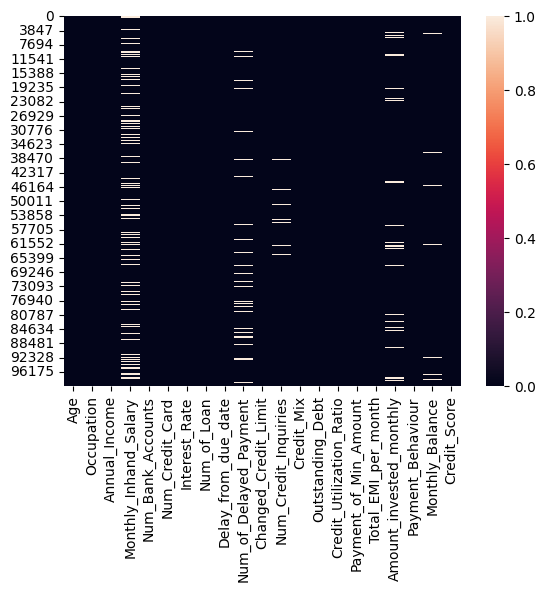

In [6]:
sns.heatmap(df_c.isnull())

In [7]:
df_c.isnull().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,7002


### Checking for Duplicates

In [8]:
df_c.duplicated().sum()

0

### Dropping all observations with more than 3 missing values

In [9]:
size_before_cleaning = df_c.shape
df_c = df_c[df_c.isnull().sum(axis=1) < 3]
print("{} Records dropped".format(size_before_cleaning[0] - df_c.shape[0]))

101 Records dropped


In [10]:
def filter_general(value):
    if '-' in str(value):
        return str(value).split('-')[1]
    elif '_' in str(value):
        return str(value).split('_')[0]
    else:
        return str(value)

In [11]:
def filter_delayed_payments(value):
    if "__" in str(value):
        return str(value).split("__")[1]
    elif '_' in str(value):
        return str(value).replace("_", "")
    elif str(value) == '_':
        return str(value)
    else:
        return str(value)

In [12]:
def Amount_invested_monthly(col):
    if "__" in str(col):
        return str(col).split("__")[1]
    else:
        return str(col)

In [13]:
df_c["Amount_invested_monthly"]=df_c["Amount_invested_monthly"].apply(Amount_invested_monthly)
df_c["Amount_invested_monthly"]=df_c["Amount_invested_monthly"].astype("float")

In [14]:
df_c["Changed_Credit_Limit"]=df_c["Changed_Credit_Limit"].apply(lambda x:x.split("-")[-1])
df_c.drop(df_c[df_c["Changed_Credit_Limit"]=="_"].index,inplace=True)
df_c["Changed_Credit_Limit"]=df_c["Changed_Credit_Limit"].astype("float")

In [15]:
df_c.drop(df_c[df_c["Monthly_Balance"]=='__-333333333333333333333333333__'].index,inplace=True)
for i in ['Age', 'Annual_Income', 'Num_of_Loan', 'Outstanding_Debt', 'Monthly_Balance']:
    df_c[i] = df_c[i].apply(filter_general)
    df_c[i] = df_c[i].astype(np.float64)
    print(i + " Successfully Cleaned")

Age Successfully Cleaned
Annual_Income Successfully Cleaned
Num_of_Loan Successfully Cleaned
Outstanding_Debt Successfully Cleaned
Monthly_Balance Successfully Cleaned


In [16]:
df_c['Num_of_Delayed_Payment'] = df_c['Num_of_Delayed_Payment'].apply(filter_delayed_payments)
df_c['Num_of_Delayed_Payment'] = df_c['Num_of_Delayed_Payment'].astype(np.float64)

In [17]:
df_c['Occupation'] = df_c['Occupation'].replace('_______', np.nan)
df_c['Occupation'] = df_c['Occupation'].fillna(np.random.choice(pd.Series(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'])))

In [18]:
df_c['Credit_Mix'] = df_c['Credit_Mix'].replace('_', np.nan)
df_c['Credit_Mix'] = df_c['Credit_Mix'].fillna(np.random.choice(pd.Series(['Standard', 'Good', 'Bad'])))

In [19]:
df_c['Payment_of_Min_Amount'] = df_c['Payment_of_Min_Amount'].replace('NM', np.nan)
df_c['Payment_of_Min_Amount'] = df_c['Payment_of_Min_Amount'].fillna(np.random.choice(pd.Series(['Yes', 'No'])))

In [20]:
df_c['Payment_Behaviour'] = df_c['Payment_Behaviour'].replace('!@9#%8', np.nan)
df_c['Payment_Behaviour'] = df_c['Payment_Behaviour'].fillna(np.random.choice(pd.Series(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments'])))

In [21]:
for i in ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly']:
    df_c[i].fillna(df_c[i].median(), inplace=True)

In [22]:
df_c['Monthly_Balance'].fillna(df_c['Monthly_Balance'].median(), inplace=True)

### Data Visualization and Statistical insights

In [23]:
df_c.describe(include='all').style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,97799.000000,97799,97799.000000,97799.000000,97799.000000,97799.000000,97799.000000,97799.000000,97799.000000,97799.000000,97799.000000,97799.000000,97799,97799.000000,97799.000000,97799,97799.000000,97799.000000,97799,97799.000000,97799
unique,nan,15,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,3,nan,nan,2,nan,nan,6,nan,3
top,nan,Media_Manager,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Good,nan,nan,Yes,nan,nan,Low_spent_Small_value_payments,nan,Standard
freq,nan,12997,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,43548,nan,nan,51164,nan,nan,24921,nan,52020
mean,119.985153,nan,175441.663404,4027.005640,17.087404,22.518891,72.289103,10.747370,21.073150,29.809957,10.464173,27.318183,nan,1426.299152,32.282054,nan,1406.498229,615.602370,nan,401.639906,nan
std,687.568412,nan,1422851.517850,2961.624830,117.233274,129.222276,466.472121,61.596415,14.866001,218.435605,6.668569,191.044206,nan,1155.320700,5.114341,nan,8312.094625,2001.490408,nan,212.574825,nan
min,14.000000,nan,7005.930000,303.645417,-1.000000,0.000000,1.000000,0.000000,-5.000000,-3.000000,0.000000,0.000000,nan,0.230000,20.000000,nan,0.000000,0.000000,nan,0.007760,nan
25%,25.000000,nan,19436.305000,1789.873333,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.350000,3.000000,nan,566.080000,28.049940,nan,30.319985,76.913387,nan,270.916082,nan
50%,34.000000,nan,37551.780000,3091.000000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,nan,1166.230000,32.301174,nan,69.246684,135.770733,nan,336.652588,nan
75%,42.000000,nan,72740.960000,5371.220000,7.000000,7.000000,20.000000,6.000000,28.000000,18.000000,14.860000,9.000000,nan,1945.675000,36.491492,nan,161.373123,254.946349,nan,467.500431,nan


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>],
       [<Axes: title={'center': 'Num_Credit_Card'}>,
        <Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Num_of_Loan'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>],
       [<Axes: title={'center': 'Num_of_Delayed_Payment'}>,
        <Axes: title={'center': 'Changed_Credit_Limit'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>],
       [<Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'Amount_invested_monthly'}>,
        <Axes: title={'center': 'Monthly_Balance'}>]], dtype=object)

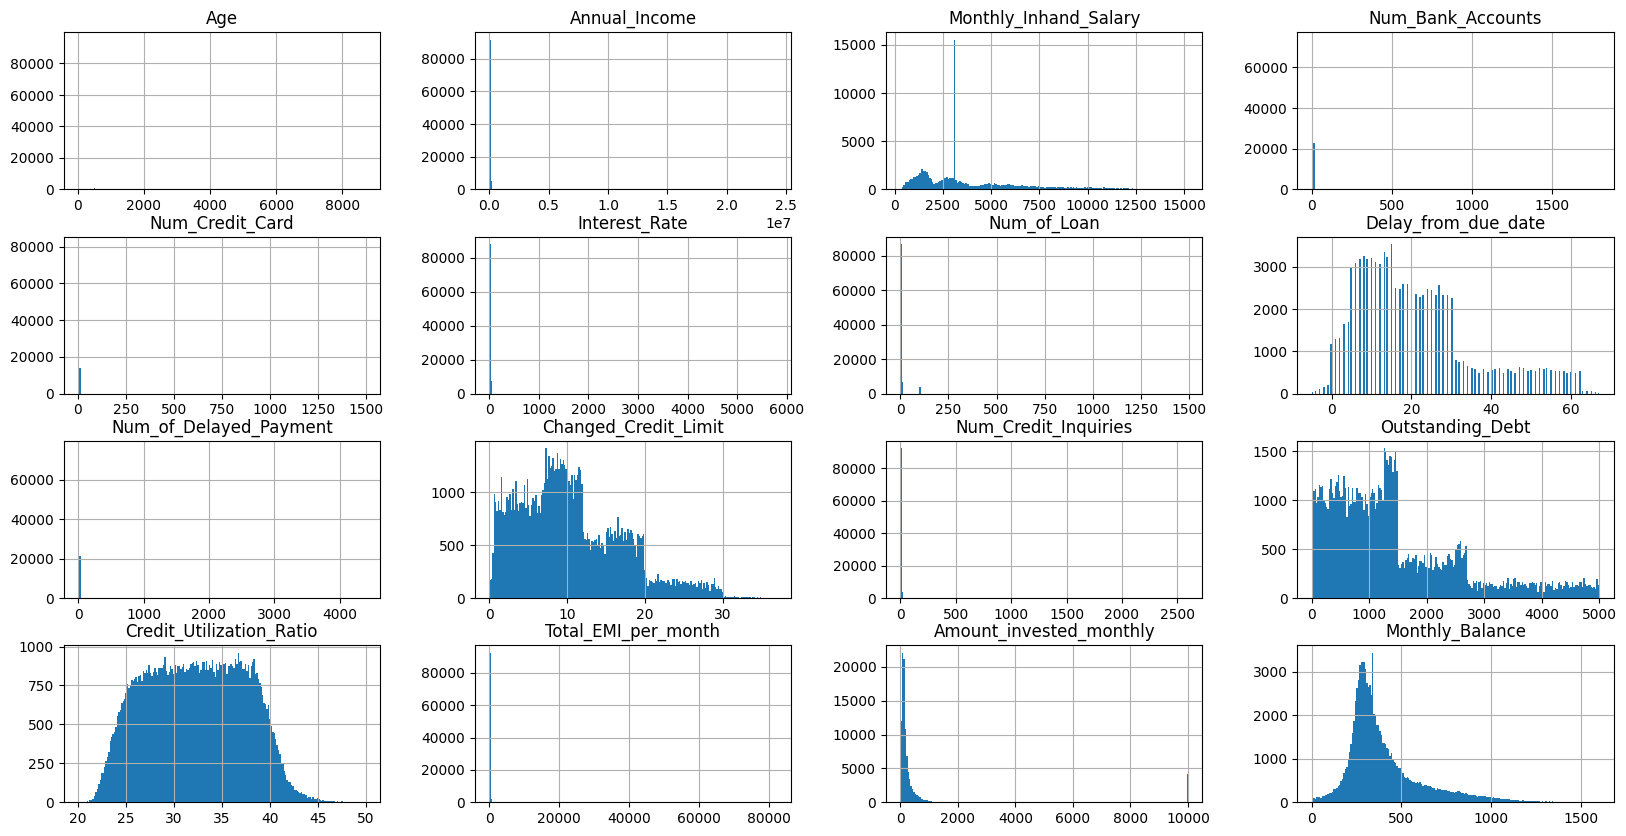

In [24]:
df_c.hist(bins=200,figsize=[20,10])

In [25]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

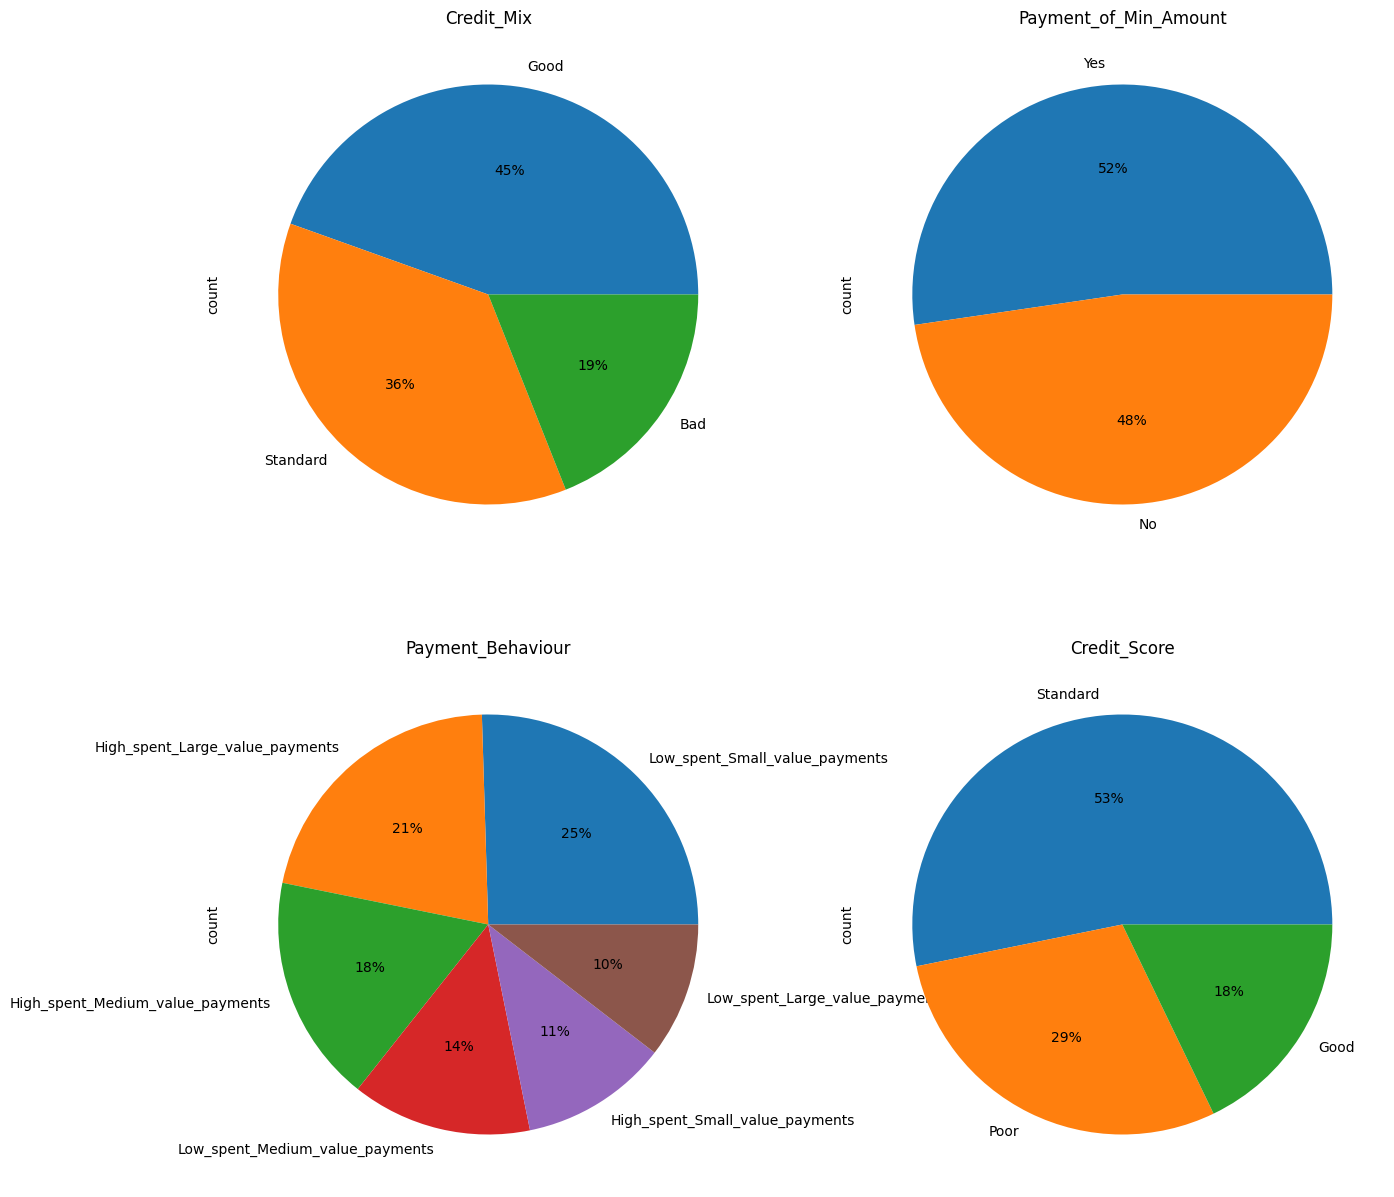

In [26]:
pie_plot(df_c, ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'], 2,2)

In [27]:
df_c.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,4.0,Good,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,23.0,Scientist,19114.12,3091.000000,3,4,3,4.0,-1,14.0,11.27,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
3,23.0,Scientist,19114.12,3091.000000,3,4,3,4.0,5,4.0,6.27,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,6,14.0,11.27,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,23.0,Scientist,19114.12,3091.000000,3,4,3,4.0,8,4.0,9.27,4.0,Good,809.98,27.262259,No,49.574949,62.430172,High_spent_Large_value_payments,340.479212,Good


In [28]:
numeric_cols = df_c.select_dtypes(exclude = "object").columns
cat_cols = df_c.select_dtypes(include = "object").columns
print(numeric_cols)
print(cat_cols)

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')
Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')


### Bivariate Categorical Analysis


<Axes: xlabel='Occupation', ylabel='count'>

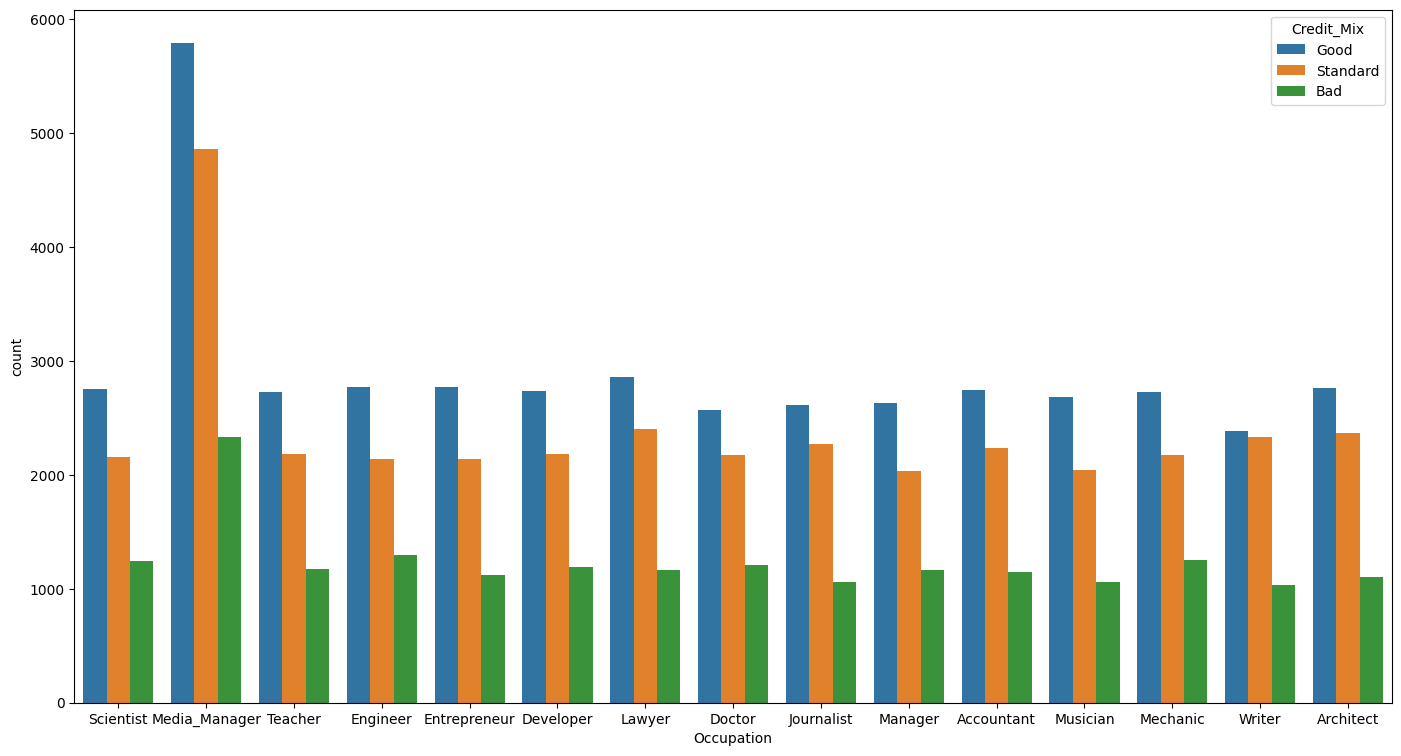

In [29]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=df_c,x="Occupation",hue="Credit_Mix")

<Axes: xlabel='Occupation', ylabel='count'>

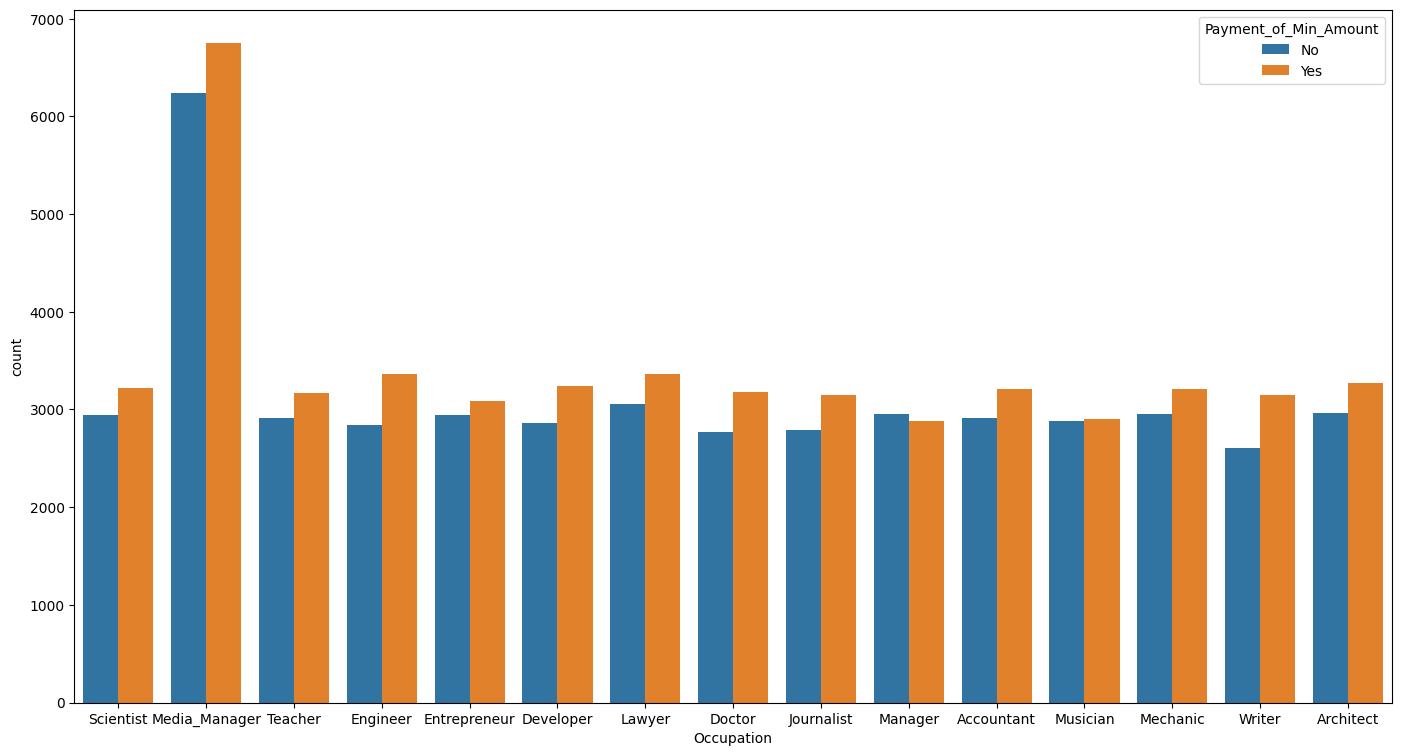

In [30]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=df_c,x="Occupation",hue="Payment_of_Min_Amount")

<Axes: xlabel='Occupation', ylabel='count'>

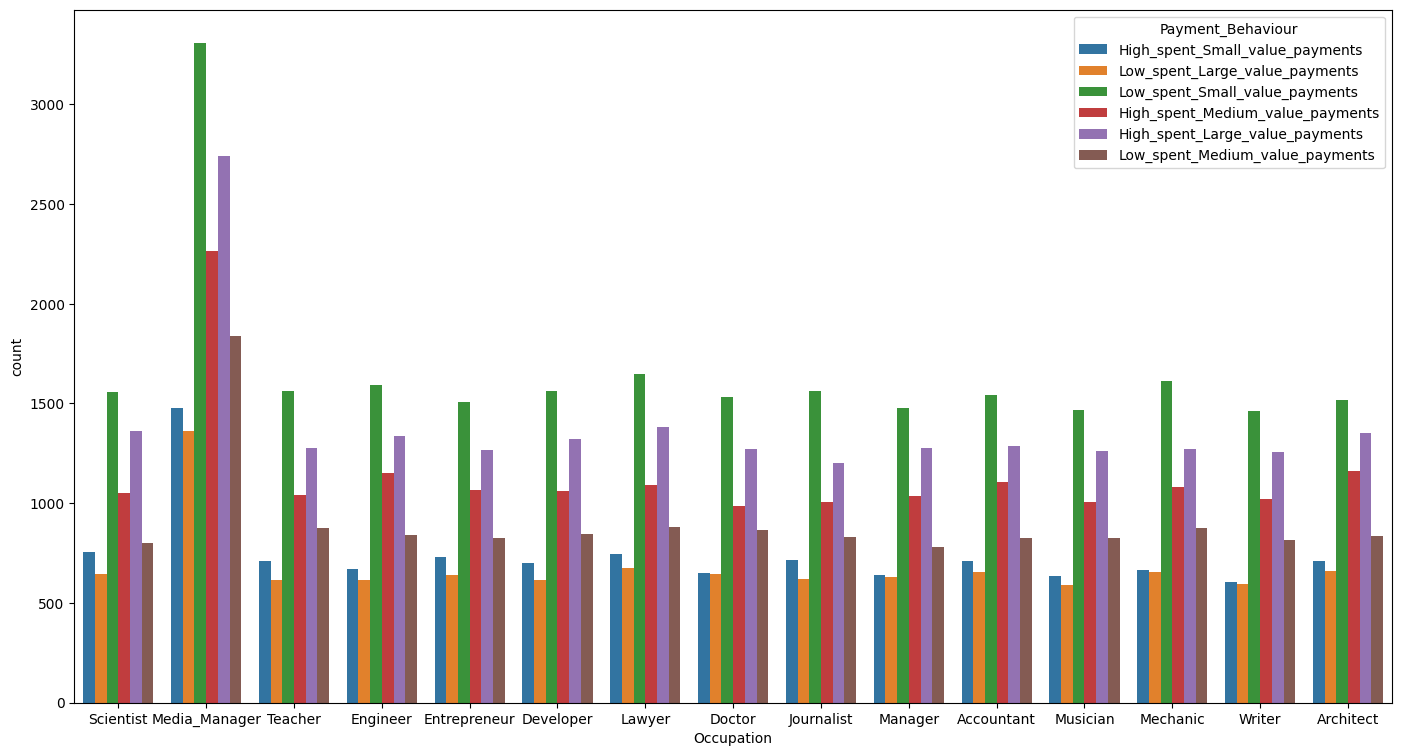

In [31]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=df_c,x="Occupation",hue="Payment_Behaviour")

<Axes: xlabel='Occupation', ylabel='count'>

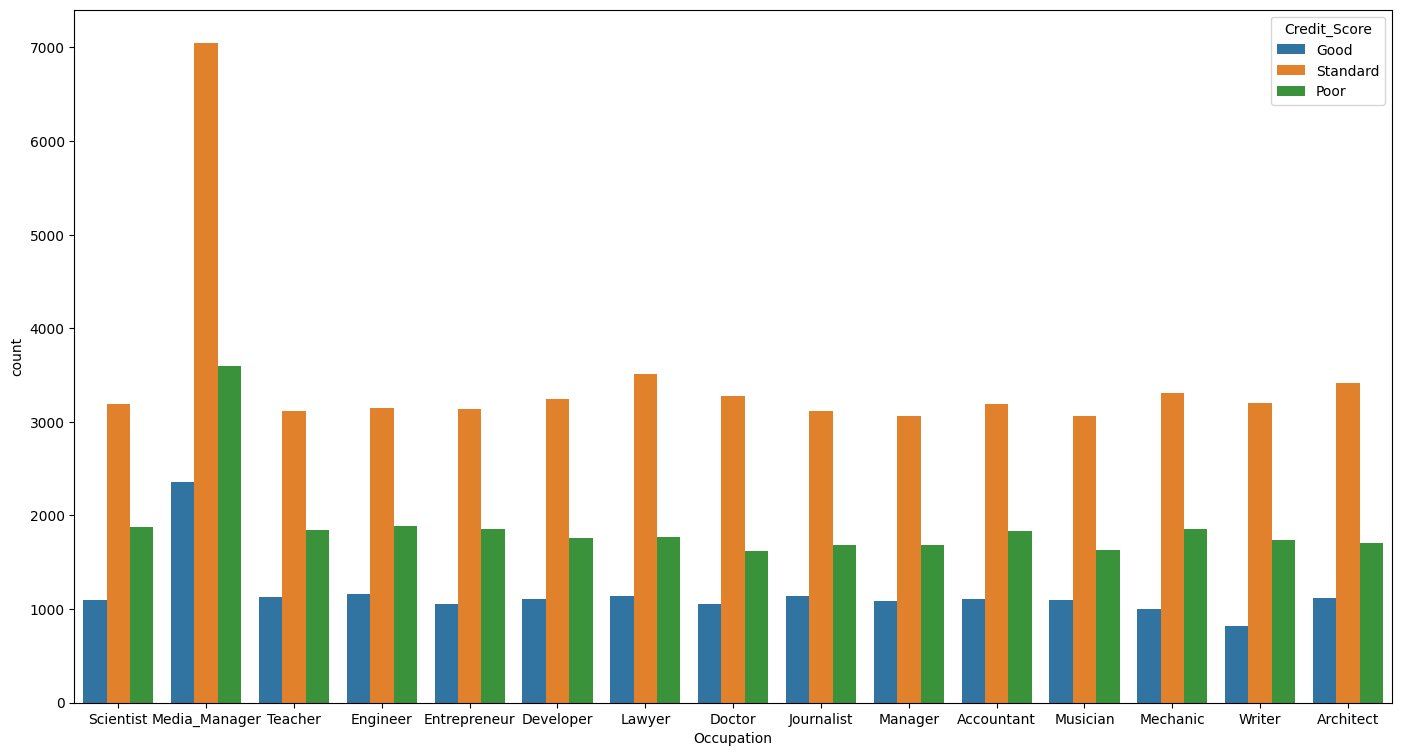

In [32]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=df_c,x="Occupation",hue="Credit_Score")

## Checking multicollinearity with VIF
Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

<img src="http://ai-ml-analytics.com/wp-content/uploads/2020/07/VIF_variance_inflation_factor.gif" width="250"/>

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

As we see from the formula, greater the value of R-squared, greater is the VIF. Hence, greater VIF denotes greater correlation. This is in agreement with the fact that a higher R-squared value denotes a stronger collinearity. Generally, a VIF above 5 indicates a high multicollinearity.

In [33]:
vif_df = df_c[numeric_cols]

vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(vif_df.values ,i) for i in range(len(vif_df.columns))]
vif_data.head(17)

,feature,VIF
0,Age,1.030047
1,Annual_Income,1.016152
2,Monthly_Inhand_Salary,4.751792
3,Num_Bank_Accounts,1.021315
4,Num_Credit_Card,1.029829
5,Interest_Rate,1.023865
6,Num_of_Loan,1.030466
7,Delay_from_due_date,4.436032
8,Num_of_Delayed_Payment,1.018732
9,Changed_Credit_Limit,4.290441


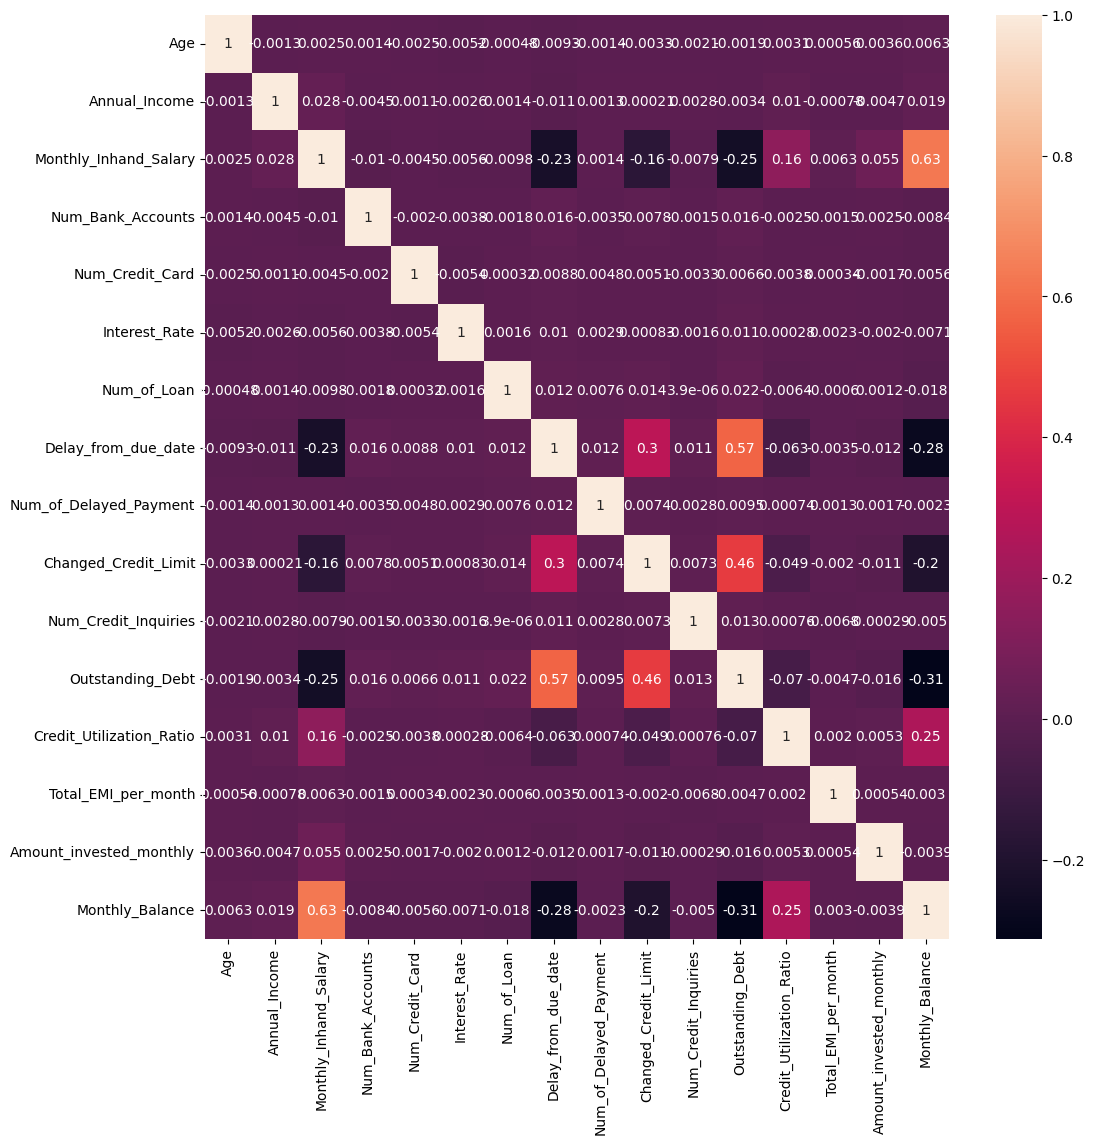

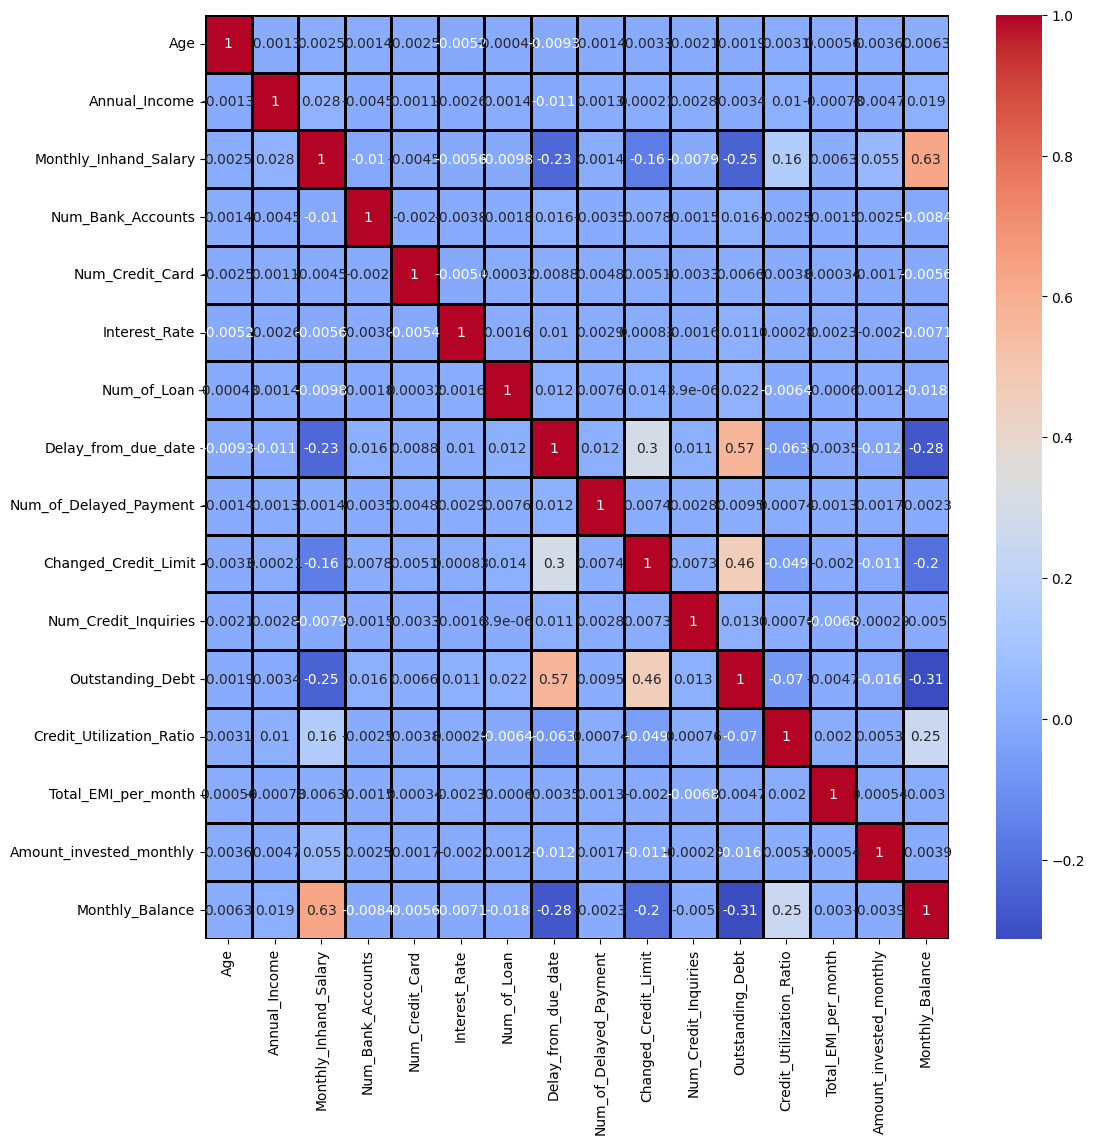

In [34]:
plt.figure(figsize= (12,12))
sns.heatmap(df_c[numeric_cols].corr(),annot=True)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
sns.heatmap(
    df_c[numeric_cols].corr(),
    annot=True,
    annot_kws={"size": 10},
    cmap="coolwarm",
    linewidths=1,
    linecolor='black'
)
plt.show()

We notice that data is clear from multi-colinearity from the VIF test and confirmed with the correlation matrix

### Dealing with outliers

<img src=https://miro.medium.com/max/1204/1*SNAAr7HVCuRee8J4DToMLA.png width=700 />

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal. Before abnormal observations can be singled out, it is necessary to characterize normal observations. Two activities are essential for characterizing a set of data:

* Examination of the overall shape of the graphed data for important features, including symmetry and departures from assumptions.
* Examination of the data for unusual observations that are far removed from the mass of data. These points are often referred to as outliers. Two graphical techniques for identifying outliers, scatter plots and box plots, along with an analytic procedure for detecting outliers when the distribution is normal (Grubbs' Test)

In [35]:
def box_plot(df_c, num_cols):
    plt.figure(figsize=(20, 15))
    for i in range(len(num_cols)):
        if i == 16:
            break
        else:
            plt.subplot(4,4, i+1)
            l = num_cols[i]
            sns.boxplot(df_c[l], palette="flare")

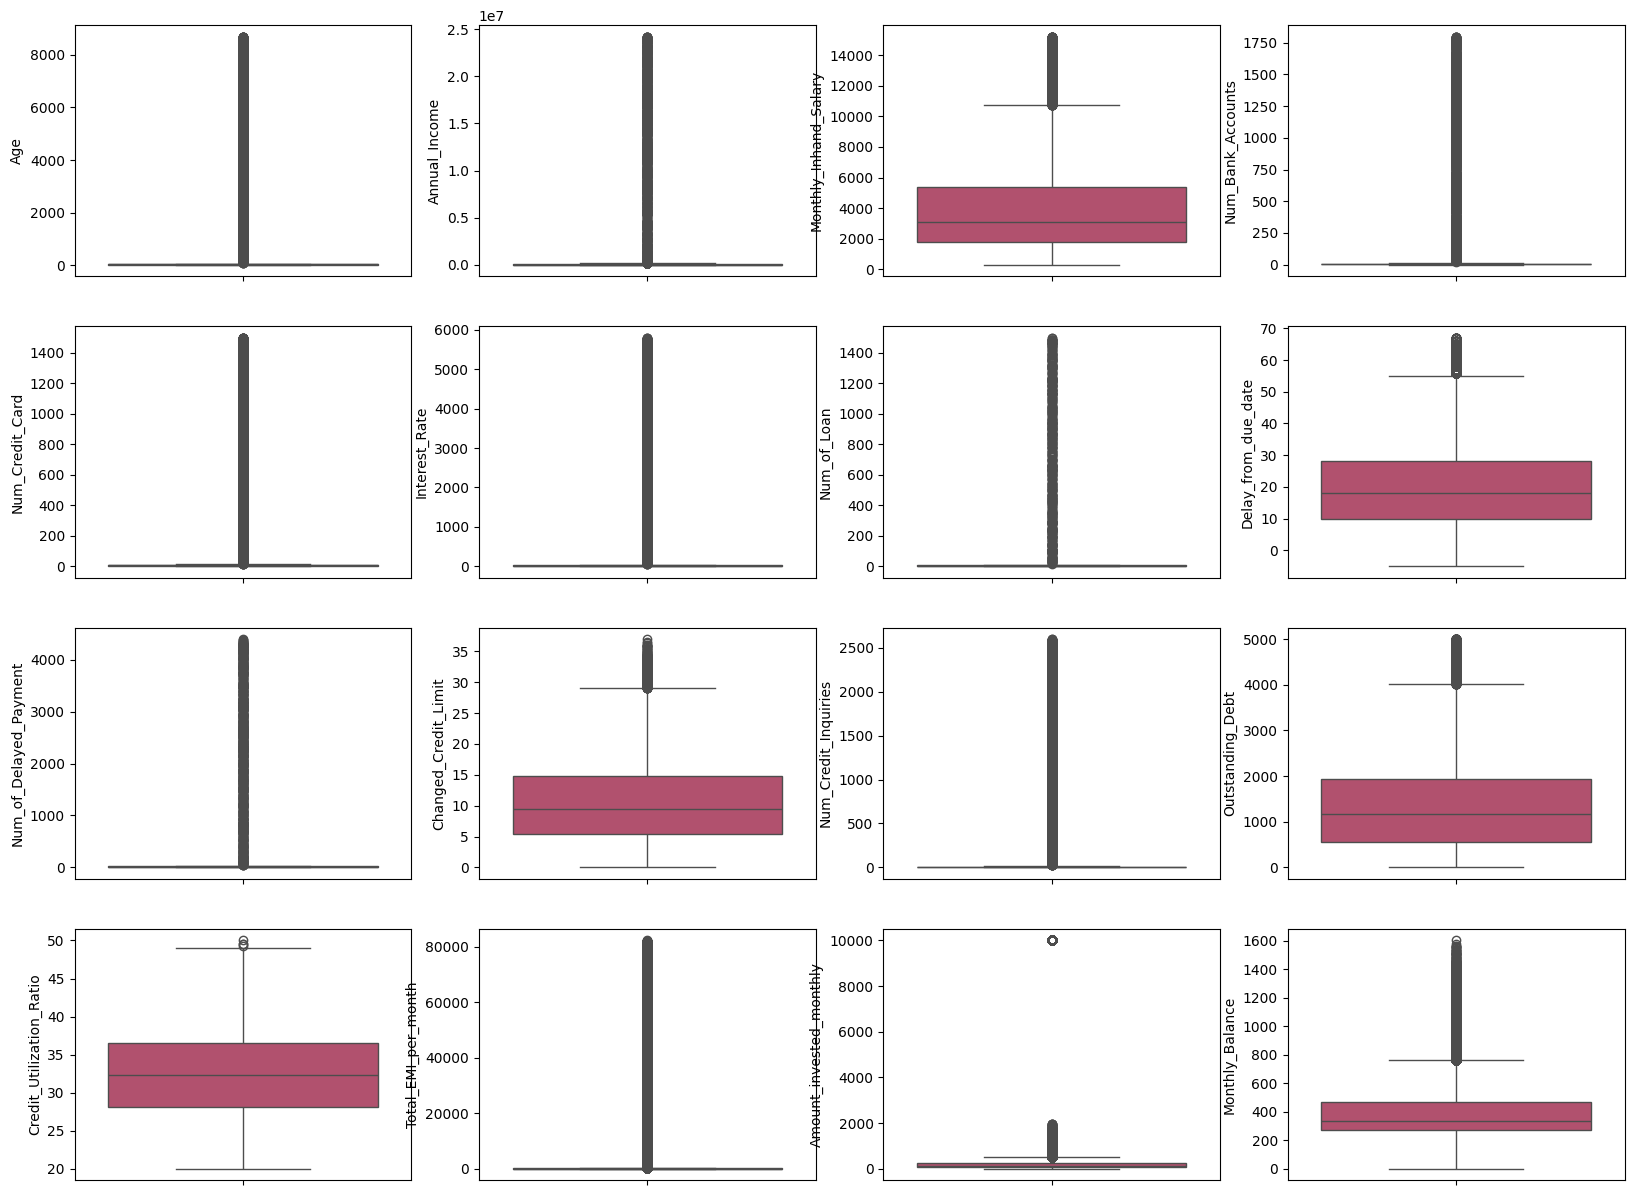

In [36]:
box_plot(df_c, numeric_cols)

### IQR (Inter Quartile Range)

IQR (Inter Quartile Range) Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field.

    IQR = Quartile3 – Quartile1

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

    upper = Q3 +1.5*IQR

    lower = Q1 – 1.5*IQR

In the above formula as according to statistics, the 0.5 scale-up of IQR (new_IQR = IQR + 0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

In [37]:
df_c_n = df_c.copy()
for i in numeric_cols:
    ''' Detection '''
    # IQR
    Q1 = np.percentile(df_c_n[i], 0.05,interpolation = 'midpoint')
    Q3 = np.percentile(df_c_n[i], 99.95,interpolation = 'midpoint')
    print("@ Feature " + i + "...")
    print("Old Shape: ", df_c_n.shape)
    df_c_n[numeric_cols] = df_c_n[numeric_cols][(df_c_n[i] < Q3) & (df_c_n[i] > Q1)]
    df_c_n.dropna(inplace=True)
    print("New Shape: ", df_c_n.shape)

@ Feature Age...
Old Shape:  (97799, 21)
New Shape:  (96598, 21)
@ Feature Annual_Income...
Old Shape:  (96598, 21)
New Shape:  (96500, 21)
@ Feature Monthly_Inhand_Salary...
Old Shape:  (96500, 21)
New Shape:  (96402, 21)
@ Feature Num_Bank_Accounts...
Old Shape:  (96402, 21)
New Shape:  (92102, 21)
@ Feature Num_Credit_Card...
Old Shape:  (92102, 21)
New Shape:  (90260, 21)
@ Feature Interest_Rate...
Old Shape:  (90260, 21)
New Shape:  (88056, 21)
@ Feature Num_of_Loan...
Old Shape:  (88056, 21)
New Shape:  (79171, 21)
@ Feature Delay_from_due_date...
Old Shape:  (79171, 21)
New Shape:  (79076, 21)
@ Feature Num_of_Delayed_Payment...
Old Shape:  (79076, 21)
New Shape:  (78994, 21)
@ Feature Changed_Credit_Limit...
Old Shape:  (78994, 21)
New Shape:  (78909, 21)
@ Feature Num_Credit_Inquiries...
Old Shape:  (78909, 21)
New Shape:  (74152, 21)
@ Feature Outstanding_Debt...
Old Shape:  (74152, 21)
New Shape:  (74068, 21)
@ Feature Credit_Utilization_Ratio...
Old Shape:  (74068, 21)
New 

In [38]:
df_c_n.drop(df_c_n[df_c_n["Age"] >= 80].index, inplace=True)
df_c_n.drop(df_c_n[df_c_n["Annual_Income"] >= 500000].index, inplace=True)
df_c_n.drop(df_c_n[df_c_n["Num_Bank_Accounts"] >= 20].index, inplace=True)
df_c_n.drop(df_c_n[df_c_n["Num_Credit_Card"] >= 50].index, inplace=True)
df_c_n.drop(df_c_n[df_c_n["Num_of_Loan"] >= 20].index, inplace=True)
df_c_n.drop(df_c_n[df_c_n["Interest_Rate"] >= 35].index, inplace=True)
df_c_n.drop(df_c_n[df_c_n["Num_of_Delayed_Payment"] >= 30].index, inplace=True)
df_c_n.drop(df_c_n[df_c_n["Num_Credit_Inquiries"] >= 100].index, inplace=True)
df_c_n.drop(df_c_n[df_c_n["Total_EMI_per_month"] >= 2000].index, inplace=True)
df_c_n.drop(df_c_n[df_c_n["Amount_invested_monthly"] >= 1000].index, inplace=True)

In [39]:
df_c_n.head(2)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,26.82262,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,23.0,Scientist,19114.12,3091.000000,3.0,4.0,3.0,4.0,-1.0,14.0,11.27,4.0,Good,809.98,31.94496,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good


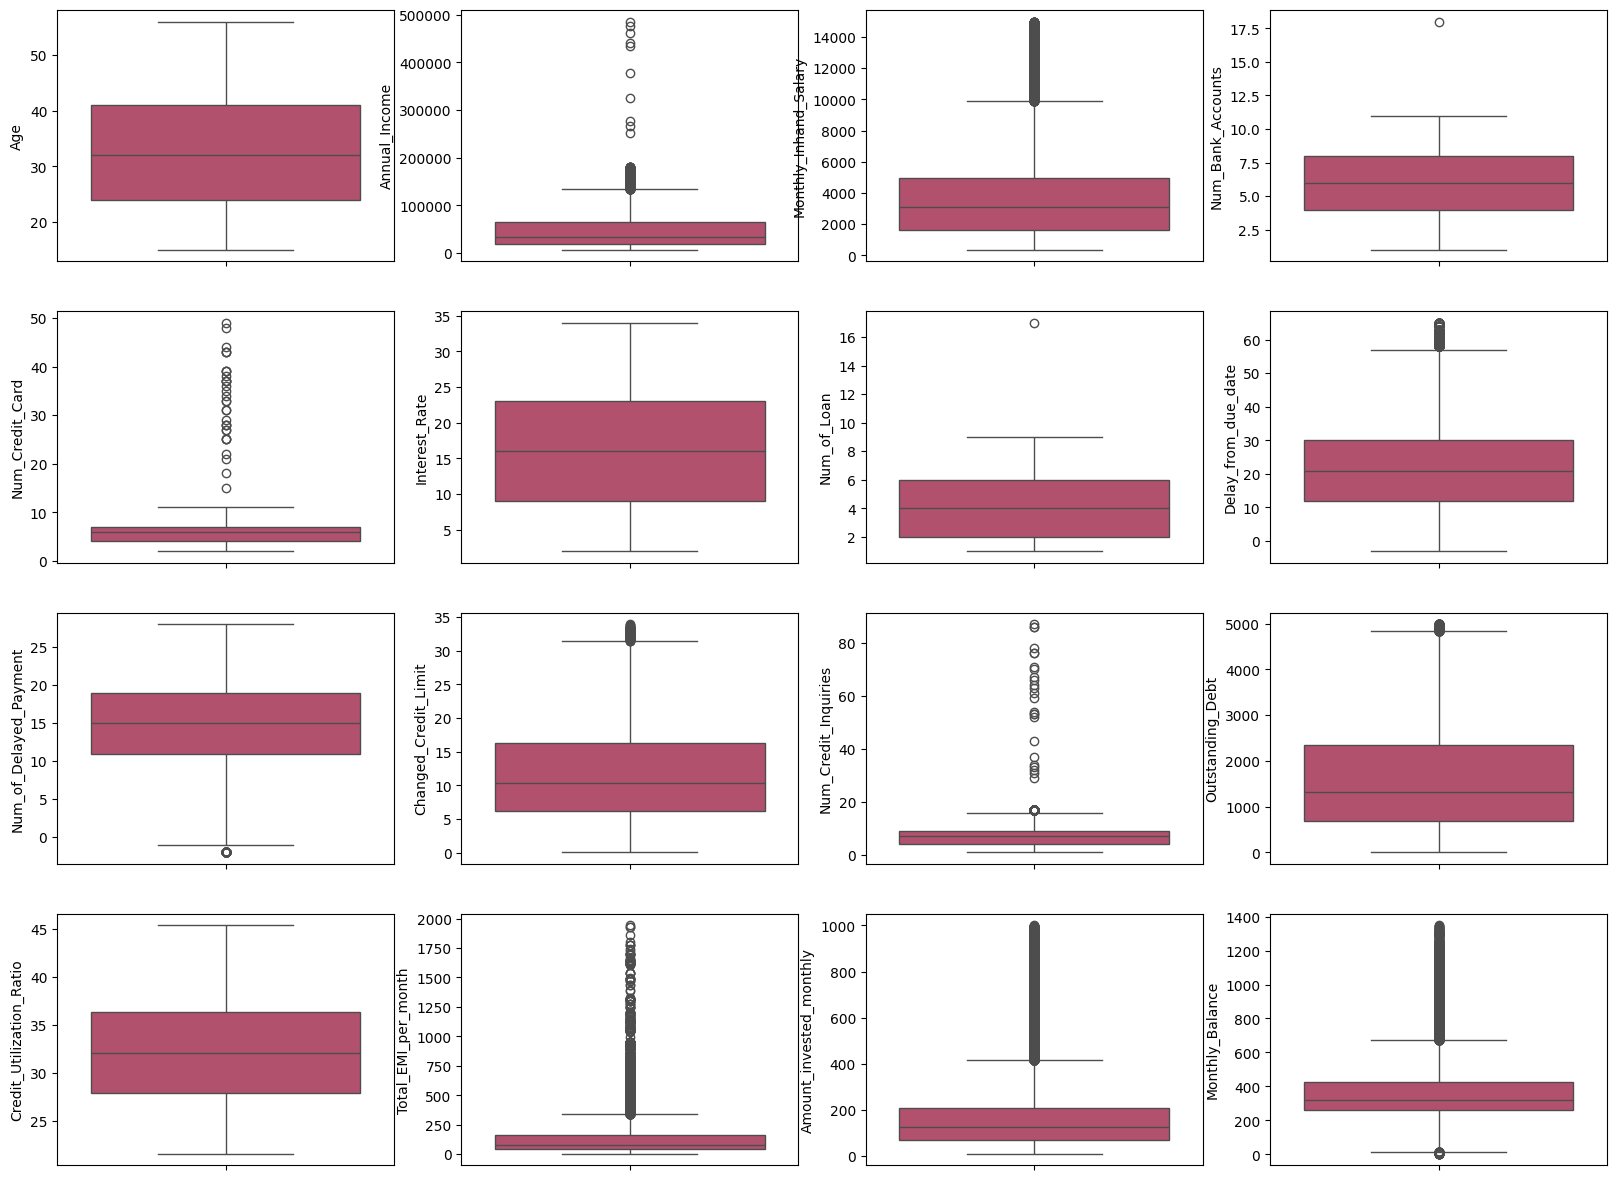

In [40]:
box_plot(df_c_n, numeric_cols)

## Handling numirical data
#### StandardScaler
follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.

#### MinMaxScaler
scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This scaling compresses all the inliers in the narrow range [0, 0.005].
In the presence of outliers, StandardScaler does not guarantee balanced feature scales, due to the influence of the outliers while computing the empirical mean and standard deviation. This leads to the shrinkage in the range of the feature values.
By using RobustScaler(), we can remove the outliers and then use either StandardScaler or MinMaxScaler for preprocessing the dataset.

In [41]:
df_num_clean = df_c_n[numeric_cols].copy()

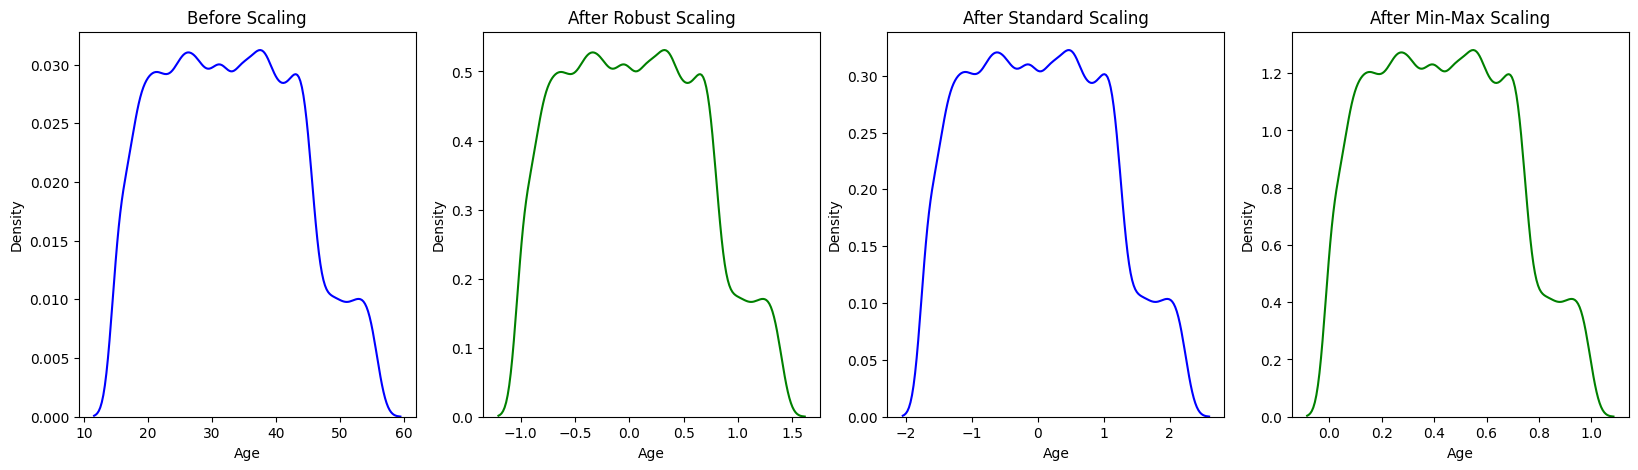

In [42]:
cols = numeric_cols
scaler = preprocessing.RobustScaler()
robust_df_ = scaler.fit_transform(df_num_clean)
robust_df_ = pd.DataFrame(robust_df_, columns =cols)

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(df_num_clean)
standard_df = pd.DataFrame(standard_df, columns =cols)

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(df_num_clean)
minmax_df = pd.DataFrame(minmax_df, columns =cols)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')

sns.kdeplot(df_num_clean['Age'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')

sns.kdeplot(robust_df_['Age'], ax = ax2, color ='g')
ax3.set_title('After Standard Scaling')

sns.kdeplot(standard_df['Age'], ax = ax3, color ='b')
ax4.set_title('After Min-Max Scaling')

sns.kdeplot(minmax_df['Age'], ax = ax4, color ='g')
plt.show()

In [43]:
def RobustScaling(df_num, cols):
    scaler = preprocessing.RobustScaler()
    robust_df_temp = scaler.fit_transform(df_num)
    robust_df_temp = pd.DataFrame(robust_df_temp, columns =cols)
    return robust_df_temp

In [44]:
robust_scaled = RobustScaling(df_num_clean, numeric_cols)

In [45]:
robust_scaled.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,-1.000000,-1.000,0.096135,-0.6,-0.312965,-0.625118,-0.223513,-0.338718,-0.047445
1,-0.529412,-0.336516,0.000000,-0.75,-0.666667,-0.928571,0.0,-1.222222,-0.125,0.096135,-0.6,-0.312965,-0.017187,-0.223513,-0.063568,-0.217173
2,-0.529412,-0.336516,0.000000,-0.75,-0.666667,-0.928571,0.0,-0.888889,-1.375,-0.399405,-0.6,-0.312965,-0.084491,-0.223513,0.526322,-0.589813
3,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,-0.833333,-0.125,0.096135,-0.6,-0.312965,-0.865483,-0.223513,-0.622082,0.129167
4,-0.529412,-0.336516,0.000000,-0.75,-0.666667,-0.928571,0.0,-0.722222,-1.375,-0.102081,-0.6,-0.312965,-0.572941,-0.223513,-0.469410,0.123015


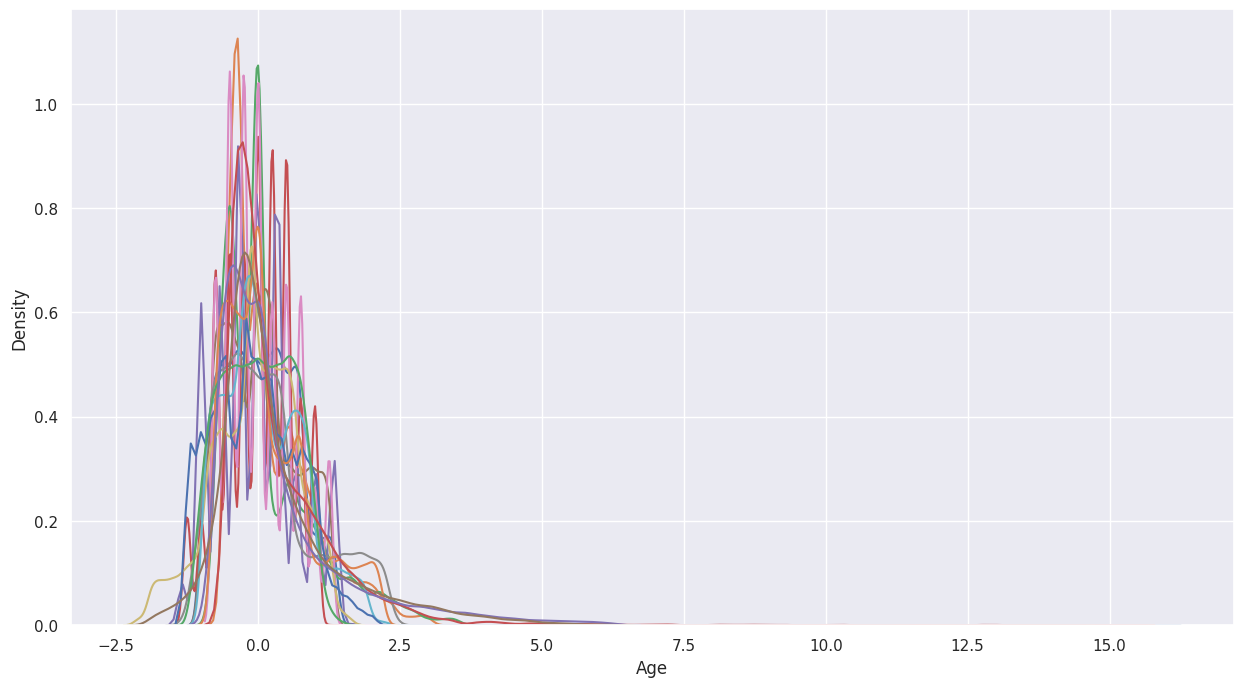

In [46]:
sns.set(rc = {'figure.figsize':(15,8)})
for i in numeric_cols:
    sns.kdeplot(robust_scaled[i], legend=True)

In [47]:
clean_df = df_c.copy()
clean_df.drop(labels=numeric_cols, axis="columns", inplace=True)
clean_df[numeric_cols] = robust_scaled[numeric_cols]

In [48]:
clean_df.head()

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,Scientist,Good,No,High_spent_Small_value_payments,Good,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,-1.000000,-1.000,0.096135,-0.6,-0.312965,-0.625118,-0.223513,-0.338718,-0.047445
1,Scientist,Good,No,Low_spent_Large_value_payments,Good,-0.529412,-0.336516,0.000000,-0.75,-0.666667,-0.928571,0.0,-1.222222,-0.125,0.096135,-0.6,-0.312965,-0.017187,-0.223513,-0.063568,-0.217173
3,Scientist,Good,No,Low_spent_Small_value_payments,Good,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,-0.833333,-0.125,0.096135,-0.6,-0.312965,-0.865483,-0.223513,-0.622082,0.129167
4,Scientist,Good,No,High_spent_Medium_value_payments,Good,-0.529412,-0.336516,0.000000,-0.75,-0.666667,-0.928571,0.0,-0.722222,-1.375,-0.102081,-0.6,-0.312965,-0.572941,-0.223513,-0.469410,0.123015
5,Scientist,Good,No,High_spent_Large_value_payments,Good,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,-1.000000,-0.875,0.096135,-0.6,-0.312965,-1.133676,-0.223513,0.372894,-0.461205


## Categorical data encoding
<img src="https://miro.medium.com/max/1400/1*TuPcb9C8rIkmpP3dZ3fp_w.png" width="600"/>

### Label Encoding
 is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.
### Label Encoding challenges
 there is a very high probability that the model captures the relationship between values like they were ordinal which isn't suitble for example for ocean proximity here.

### One-Hot Encoding

One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.

In [49]:
clean_df['Credit_Score'].replace({"Poor":0, "Standard":1, "Good":2}, inplace=True)
clean_df['Credit_Mix'].replace({"Bad":0, "Standard":1, "Good":2}, inplace=True)
clean_df['Payment_of_Min_Amount'].replace({"Yes":1, "No":0}, inplace=True)
clean_df = pd.get_dummies(clean_df, columns = ['Occupation', 'Payment_Behaviour'])

In [50]:
for i in numeric_cols:
    clean_df[i].fillna(method='ffill', inplace=True)

In [51]:
clean_df.head()

,Credit_Mix,Payment_of_Min_Amount,Credit_Score,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,2,0,2,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,-1.000000,-1.000,0.096135,-0.6,-0.312965,-0.625118,-0.223513,-0.338718,-0.047445,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
1,2,0,2,-0.529412,-0.336516,0.000000,-0.75,-0.666667,-0.928571,0.0,-1.222222,-0.125,0.096135,-0.6,-0.312965,-0.017187,-0.223513,-0.063568,-0.217173,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
3,2,0,2,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,-0.833333,-0.125,0.096135,-0.6,-0.312965,-0.865483,-0.223513,-0.622082,0.129167,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
4,2,0,2,-0.529412,-0.336516,0.000000,-0.75,-0.666667,-0.928571,0.0,-0.722222,-1.375,-0.102081,-0.6,-0.312965,-0.572941,-0.223513,-0.469410,0.123015,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
5,2,0,2,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,-1.000000,-0.875,0.096135,-0.6,-0.312965,-1.133676,-0.223513,0.372894,-0.461205,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False


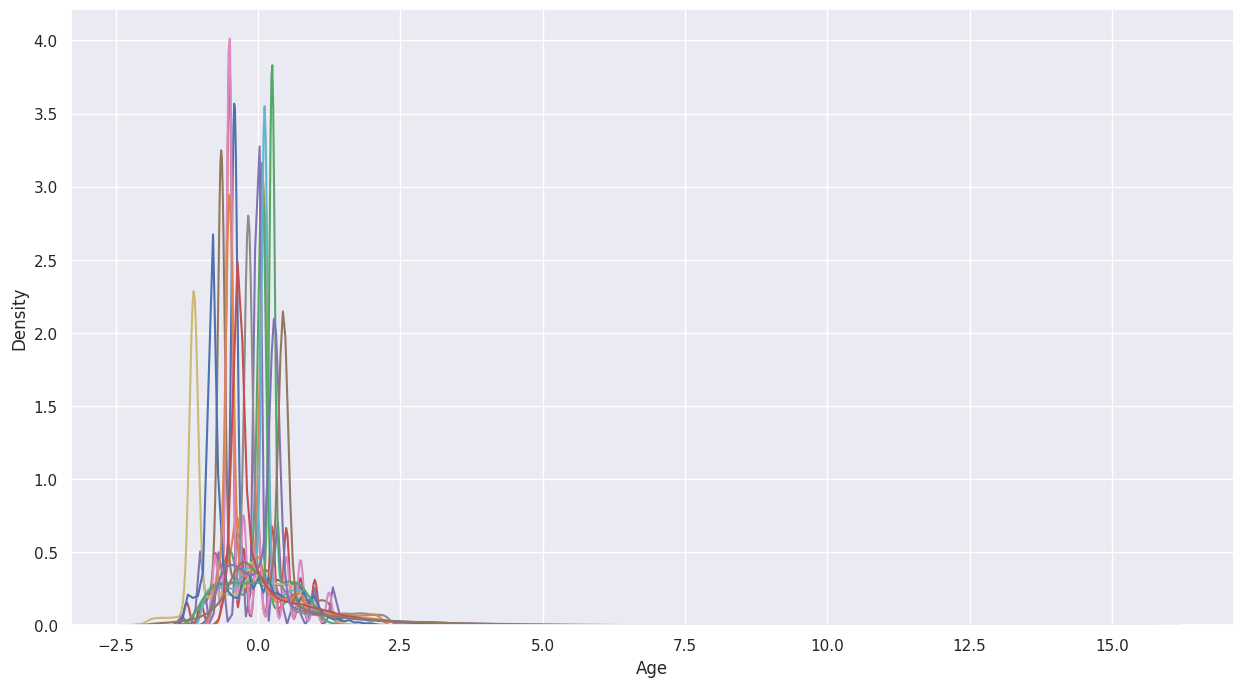

In [52]:
sns.set(rc = {'figure.figsize':(15,8)})
for i in numeric_cols:
    sns.kdeplot(clean_df[i], legend=True)

## Summary of Data Preprocessing
The data went through the process of cleaning as follows:
* Explored and visualized the data
* Handled missing values.
* Handled Outliers.
* Handled categorical data encoding using one hot encoder and Label encoder.
* Handled numerical values using a Robust Scaler

In [53]:
!pip install networkx
!pip install vaderSentiment
!pip install transformers torch



## Modeling
The process of modeling means training a machine learning algorithm to predict the labels from the features, tuning it for the business need, and validating it on holdout data. The output from modeling is a trained model that can be used for inference, making predictions on new data points.

A machine learning model itself is a file that has been trained to recognize certain types of patterns. You train a model over a set of data, providing it an algorithm that it can use to reason over and learn from those data.
Once you have trained the model, you can use it to reason over data that it hasn't seen before, and make predictions about those data. For example, let's say you want to build an application that can recognize a user's emotions based on their facial expressions. You can train a model by providing it with images of faces that are each tagged with a certain emotion, and then you can use that model in an application that can recognize any user's emotion

In [54]:
x_clean = clean_df.drop(['Credit_Score'] , axis = 1).values
y_clean = clean_df['Credit_Score'].values

### Principal Component Analysis

Principal component analysis, or PCA, is a statistical technique to convert high dimensional data to low dimensional data by selecting the most important features that capture maximum information about the dataset. The features are selected on the basis of variance that they cause in the output. The feature that causes highest variance is the first principal component. The feature that is responsible for second highest variance is considered the second principal component, and so on. It is important to mention that principal components do not have any correlation with each other.

<img src = https://hands-on.cloud/wp-content/uploads/2022/02/Implementing-Principal-component-analysis-PCA-using-Python.png width = "600"/>

#### Advantages of PCA

There are two main advantages of dimensionality reduction with PCA.

* The training time of the algorithms reduces significantly with less number of features.
* It is not always possible to analyze data in high dimensions. For instance if there are 100 features in a dataset. Total number of scatter plots required to visualize the data would be 100(100-1)2 = 4950. Practically it is not possible to analyze data this way.


In [55]:
pca = PCA(n_components=0.98)
x_reduced = pca.fit_transform(x_clean)
print("Number of original features is {} and of reduced features is {}".format(x_clean.shape[1], x_reduced.shape[1]))

Number of original features is 39 and of reduced features is 34


In [56]:
x_reduced.shape

(97799, 34)

In [57]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(x_reduced, y_clean, test_size=0.2, random_state=42)

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"Training Accuracy {name}: {train_accuracy:.2f}")
    print(f"Test Accuracy {name}: {test_accuracy:.2f}")

    actual = y_test
    predicted = model.predict(X_test)
    cm = confusion_matrix(actual, predicted)

    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Poor', 'Standard', 'Good'])
    cm_display.plot()

## Logistic Regression
This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure. This is also commonly known as the log odds, or the natural logarithm of odds, and this logistic function is represented by the following formulas:

<img src = https://miro.medium.com/max/888/1*D4CIwT2zRCcVq88iji6qYQ.png />

In this logistic regression equation, h is the dependent or response variable and x is the independent variable. The beta parameter, or coefficient, in this model is commonly estimated via maximum likelihood estimation (MLE). This method tests different values of beta through multiple iterations to optimize for the best fit of log odds. All of these iterations produce the log likelihood function, and logistic regression seeks to maximize this function to find the best parameter estimate. Once the optimal coefficient (or coefficients if there is more than one independent variable) is found, the conditional probabilities for each observation can be calculated, logged, and summed together to yield a predicted probability. For binary classification, a probability less than .5 will predict 0 while a probability greater than 0 will predict 1.  After the model has been computed, it’s best practice to evaluate the how well the model predicts the dependent variable, which is called goodness of fit.

#### Binary logistic regression:

In this approach, the response or dependent variable is dichotomous in nature—i.e. it has only two possible outcomes (e.g. 0 or 1). Some popular examples of its use include predicting if an e-mail is spam or not spam or if a tumor is malignant or not malignant. Within logistic regression, this is the most commonly used approach, and more generally, it is one of the most common classifiers for binary classification.

#### Multinomial logistic regression:

In this type of logistic regression model, the dependent variable has three or more possible outcomes; however, these values have no specified order.  For example, movie studios want to predict what genre of film a moviegoer is likely to see to market films more effectively. A multinomial logistic regression model can help the studio to determine the strength of influence a person's age, gender, and dating status may have on the type of film that they prefer. The studio can then orient an advertising campaign of a specific movie toward a group of people likely to go see it.

Training Accuracy Logistic Regression: 0.56
Test Accuracy Logistic Regression: 0.56


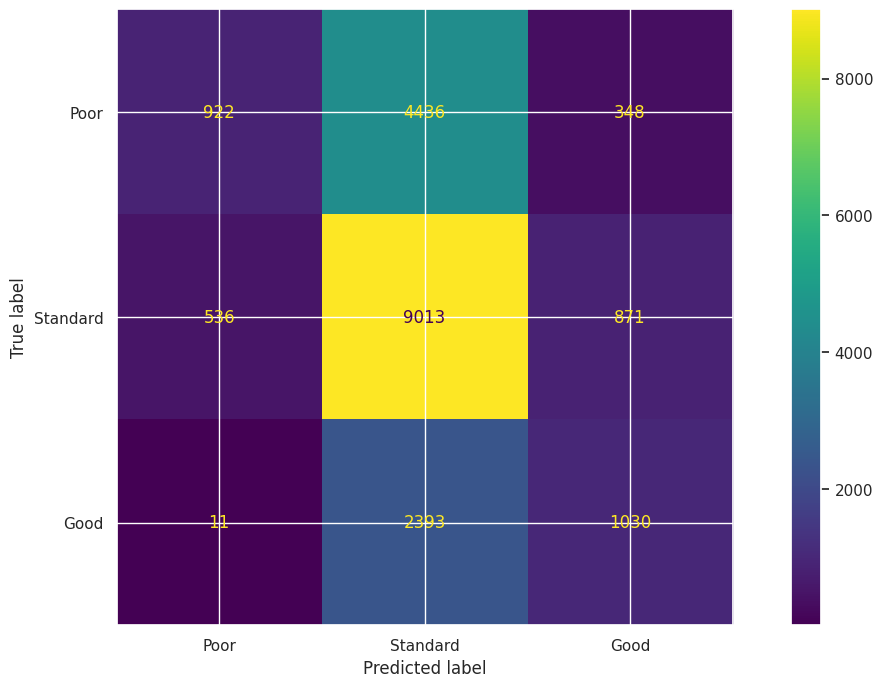

In [59]:
lr = LogisticRegression().fit(X_train_clean, y_train_clean)
evaluate_classification(lr, "Logistic Regression", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

##  k-nearest neighbors
The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.

<img src = https://miro.medium.com/max/1400/1*56MmutHmr4WzDJrufP8kug.png width = 600/>

### Determine your distance metrics

In order to determine which data points are closest to a given query point, the distance between the query point and the other data points will need to be calculated. These distance metrics help to form decision boundaries, which partitions query points into different regions. You commonly will see decision boundaries visualized with Voronoi diagram.

<img src = https://i.stack.imgur.com/JKtab.png/>

Training Accuracy KNeighborsClassifiern: 0.62
Test Accuracy KNeighborsClassifiern: 0.59


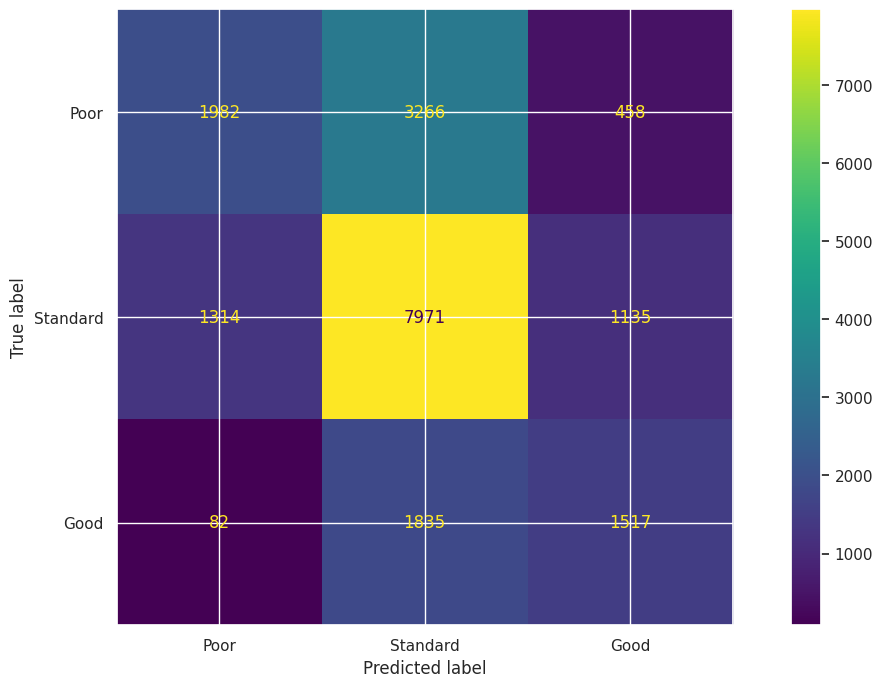

In [60]:
knn = KNeighborsClassifier(25).fit(X_train_clean, y_train_clean)
evaluate_classification(knn, "KNeighborsClassifiern", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

## Naive Bayes
Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle. Every pair of features being classified is independent of each other.
The assumptions made by Naive Bayes are not generally correct in real-world situations. In-fact, the independence assumption is never correct but often works well in practice.

Now, it is important to know about Bayes’ theorem.

### Bayes’ Theorem

Bayes’ Theorem finds the probability of an event occurring given the probability of another event that has already occurred. Bayes’ theorem is stated mathematically as the following equation:

<img src = https://hands-on.cloud/wp-content/uploads/2022/01/Implementing-Naive-Bayes-Classification-using-Python.png width=600/>

where A and B are events and P(B) ≠ 0.

* Basically, we are trying to find probability of event A, given the event B is true. Event B is also termed as evidence.
* P(A) is the priori of A (the prior probability, i.e. Probability of event before evidence is seen). The evidence is an attribute value of an unknown instance(here, it is event B).
* P(A|B) is a posteriori probability of B, i.e. probability of event after evidence is seen.

Training Accuracy Naive Bayes: 0.57
Test Accuracy Naive Bayes: 0.57


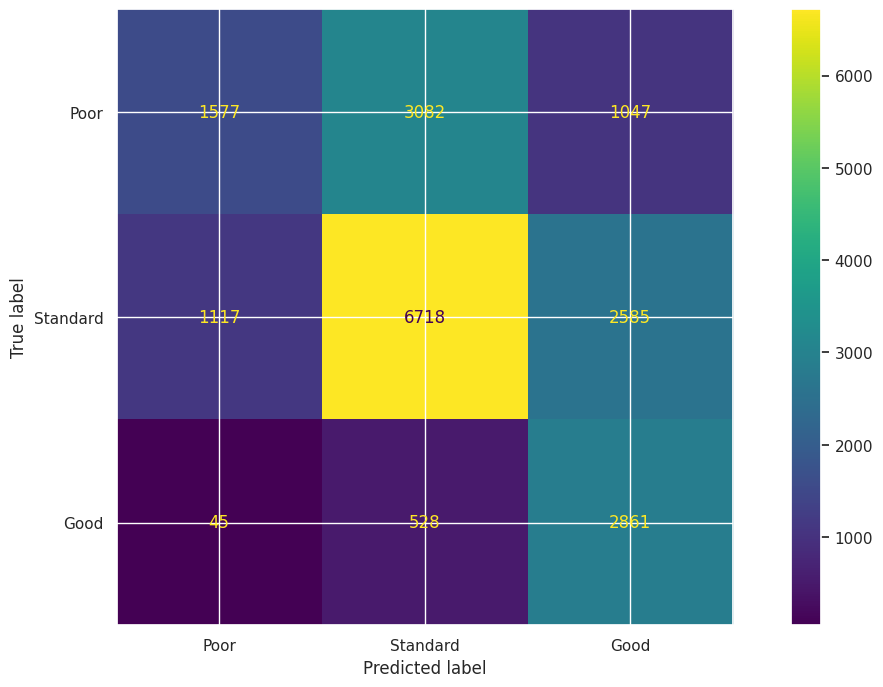

In [61]:
gnb = GaussianNB().fit(X_train_clean, y_train_clean)
evaluate_classification(gnb, "Naive Bayes", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

## Decision Tree
Decision Tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart-like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

A tree can be “learned” by splitting the source set into subsets based on an attribute value test. This process is repeated on each derived subset in a recursive manner called recursive partitioning. The recursion is completed when the subset at a node all has the same value of the target variable, or when splitting no longer adds value to the predictions.Decision trees classify instances by sorting them down the tree from the root to some leaf node, which provides the classification of the instance. An instance is classified by starting at the root node of the tree, testing the attribute specified by this node, then moving down the tree branch corresponding to the value of the attribute as shown in the above figure. This process is then repeated for the subtree rooted at the new node.
The decision tree in above figure classifies a particular morning according to whether it is suitable for playing tennis and returning the classification associated with the particular leaf.(in this case Yes or No).

Training Accuracy DecisionTreeClassifier: 0.83
Test Accuracy DecisionTreeClassifier: 0.54


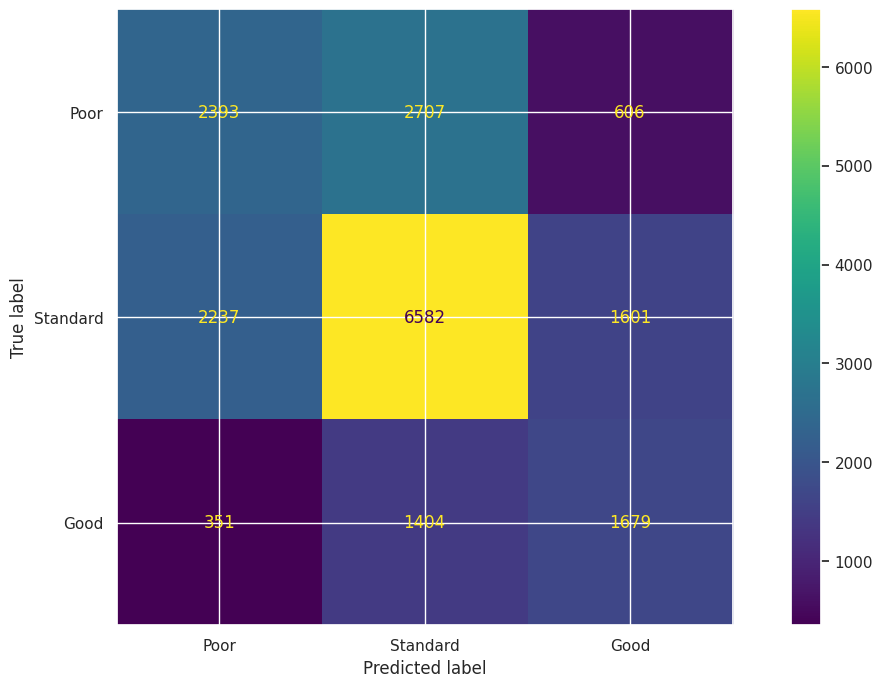

In [62]:
dt = DecisionTreeClassifier(max_depth=3).fit(X_train_clean, y_train_clean)
tdt = DecisionTreeClassifier().fit(X_train_clean, y_train_clean)
evaluate_classification(tdt, "DecisionTreeClassifier", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

### Note
We used a simple version with a max depth of 3 just for the visualization

[Text(0.5, 0.875, 'x[3] <= 0.638\ngini = 0.602\nsamples = 78239\nvalue = [22622, 41600, 14017]'),
 Text(0.25, 0.625, 'x[3] <= -0.728\ngini = 0.508\nsamples = 51680\nvalue = [18277.0, 31230.0, 2173.0]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[14] <= -0.164\ngini = 0.492\nsamples = 14766\nvalue = [8847, 5687, 232]'),
 Text(0.0625, 0.125, 'gini = 0.511\nsamples = 4801\nvalue = [2712, 1975, 114]'),
 Text(0.1875, 0.125, 'gini = 0.482\nsamples = 9965\nvalue = [6135, 3712, 118]'),
 Text(0.375, 0.375, 'x[13] <= -0.447\ngini = 0.453\nsamples = 36914\nvalue = [9430, 25543, 1941]'),
 Text(0.3125, 0.125, 'gini = 0.325\nsamples = 8996\nvalue = [1073, 7285, 638]'),
 Text(0.4375, 0.125, 'gini = 0.481\nsamples = 27918\nvalue = [8357, 18258, 1303]'),
 Text(0.75, 0.625, 'x[13] <= 0.021\ngini = 0.622\nsamples = 26559\nvalue = [4345, 10370, 11844]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 0.812\ngini = 0.622\nsamples = 26496\nvalue = [4321, 10333, 11842]'),
 Text(0.5625,

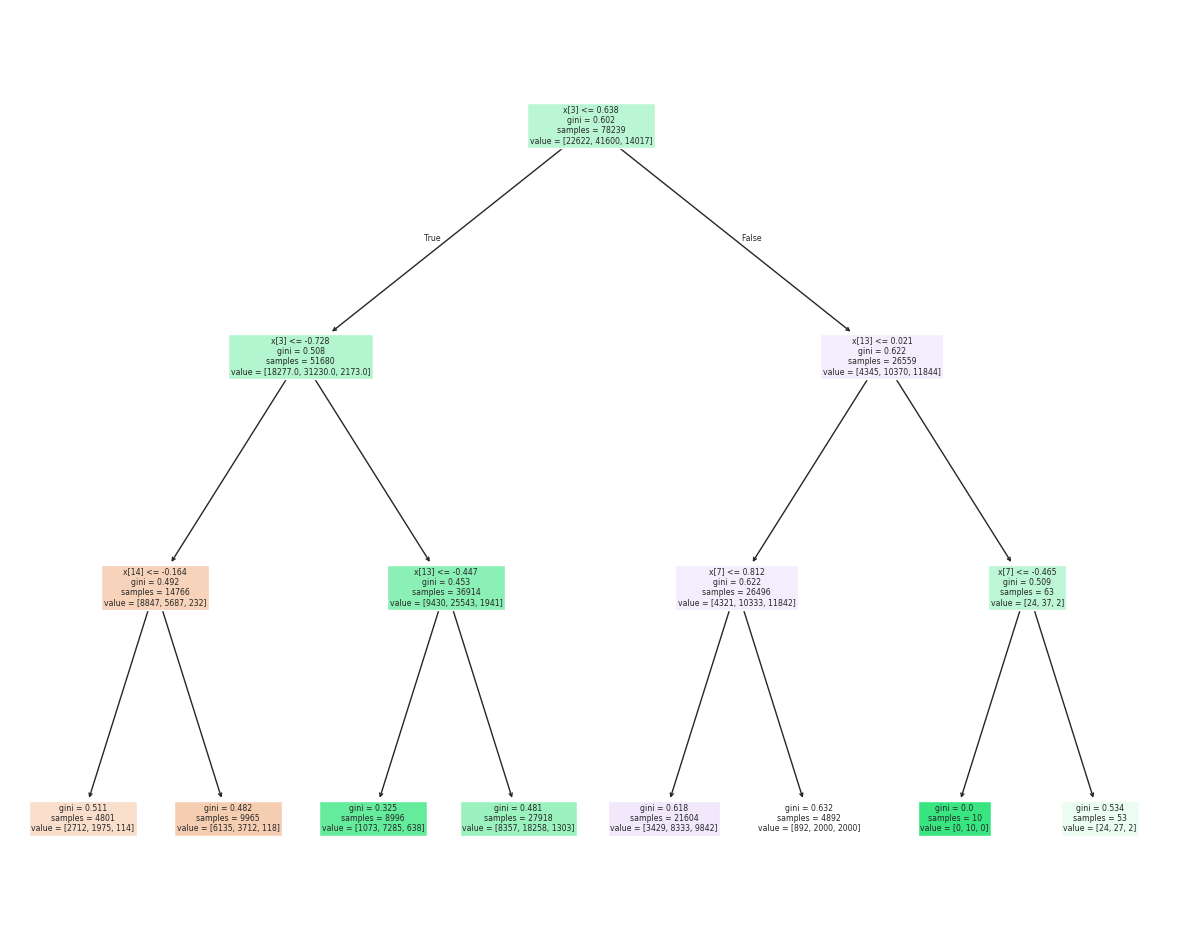

In [63]:
from sklearn import tree
fig = plt.figure(figsize=(15,12))
tree.plot_tree(dt , filled=True)

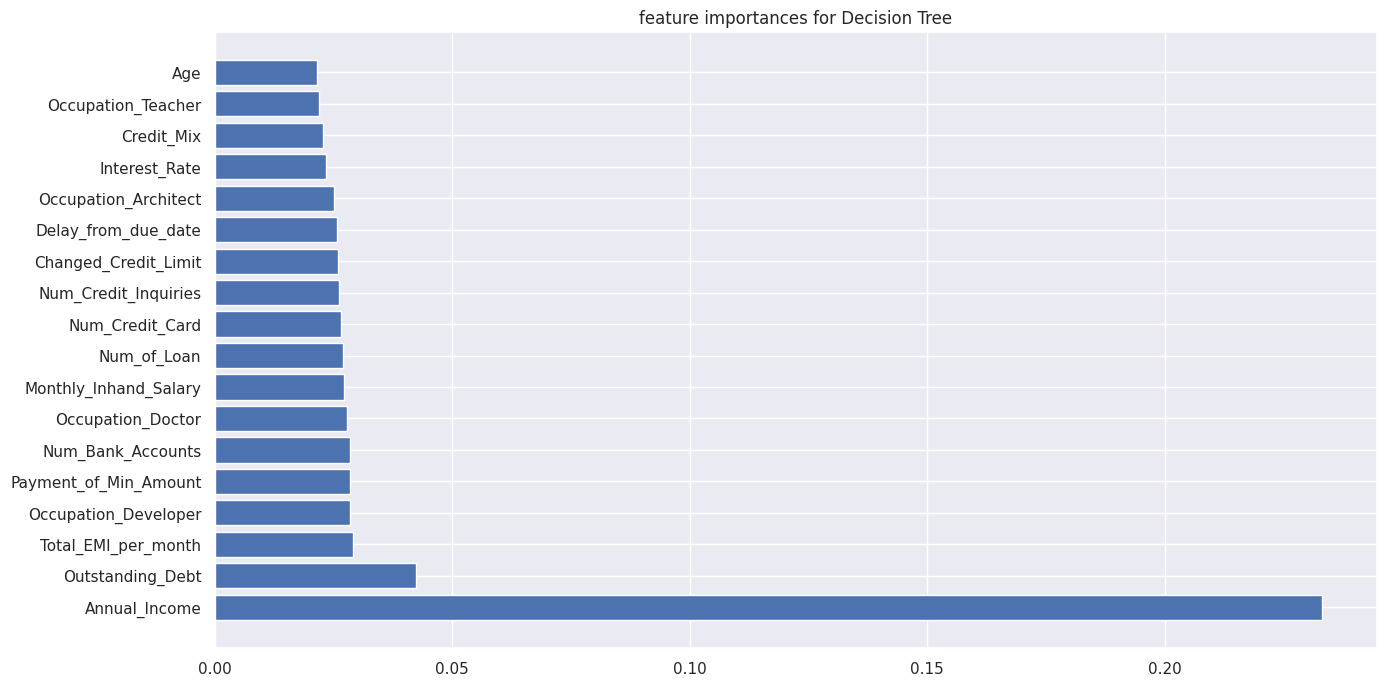

In [64]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for Decision Tree')
    plt.show()

features_names = clean_df.drop(['Credit_Score'] , axis = 1)
f_importances(abs(tdt.feature_importances_), features_names, top=18)

## Random forest
Random forest is a supervised learning algorithm. The “forest” it builds is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.One big advantage of random forest is that it can be used for both classification and regression problems, which form the majority of current machine learning systems. and It also resists overfitting found in decision trees.

Training Accuracy RandomForestClassifier: 0.83
Test Accuracy RandomForestClassifier: 0.61


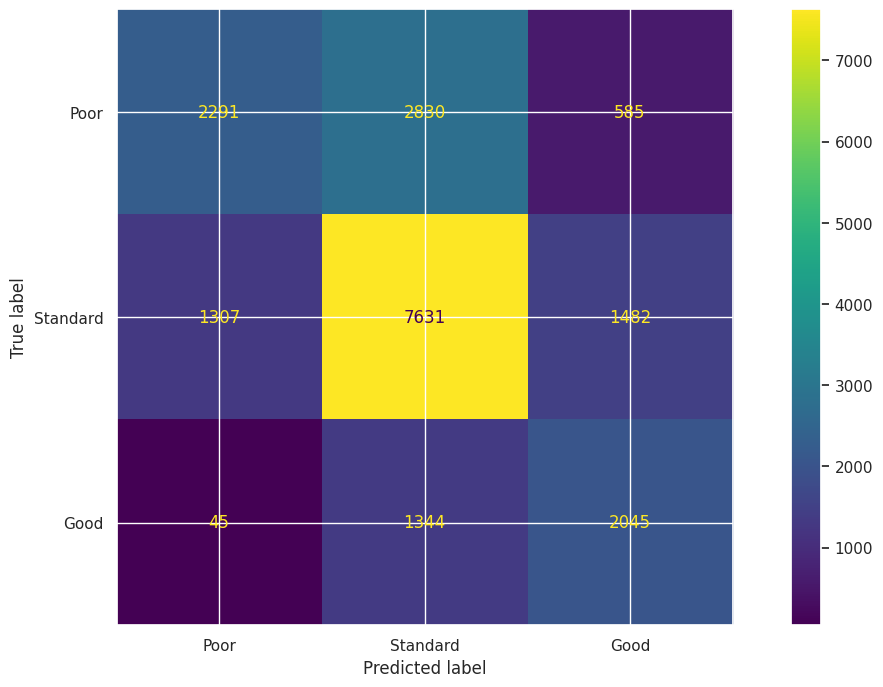

In [65]:
rf = RandomForestClassifier().fit(X_train_clean, y_train_clean)
evaluate_classification(rf, "RandomForestClassifier", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

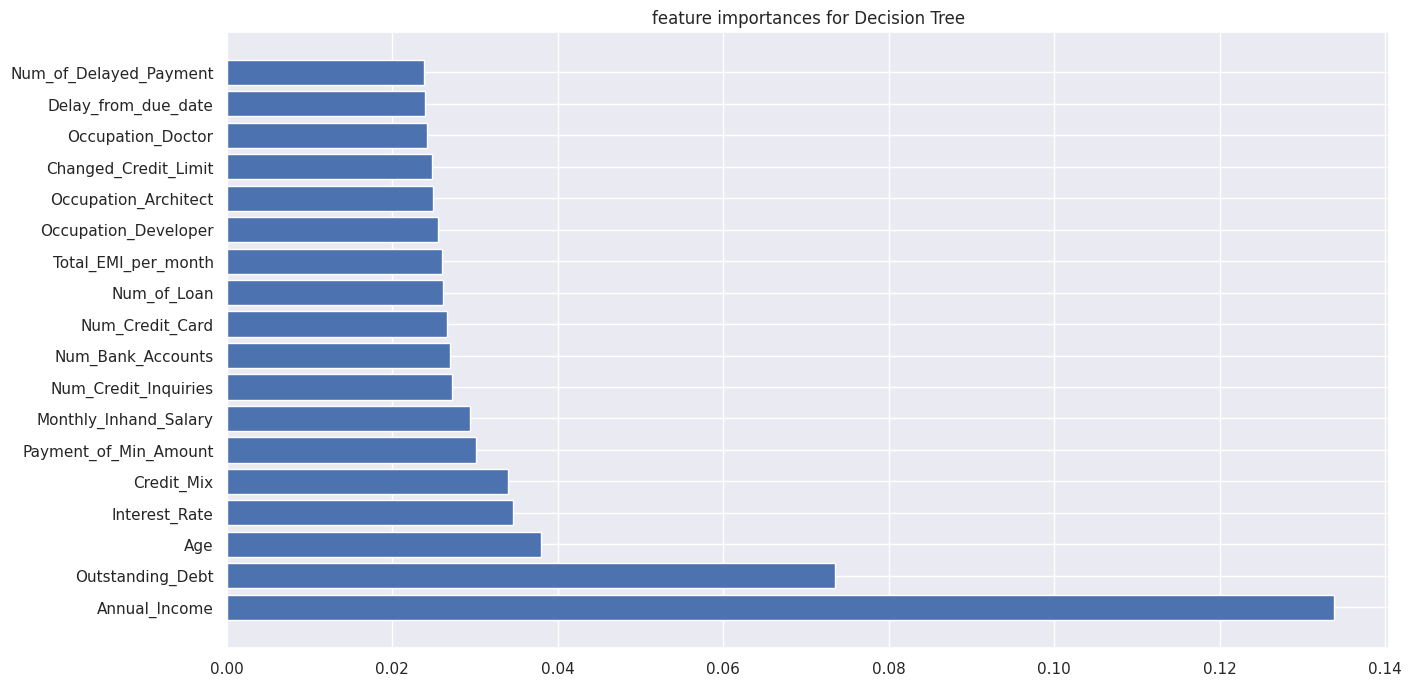

In [66]:
f_importances(abs(rf.feature_importances_), features_names, top=18)

In [67]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_train_clean.shape[1:])),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax'),
])
print(X_train_clean.shape)

(78239, 34)


In [68]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           2,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,971 (171.76 KB)

 Trainable params: 43,971 (171.76 KB)

 Non-trainable params: 0 (0.00 B)

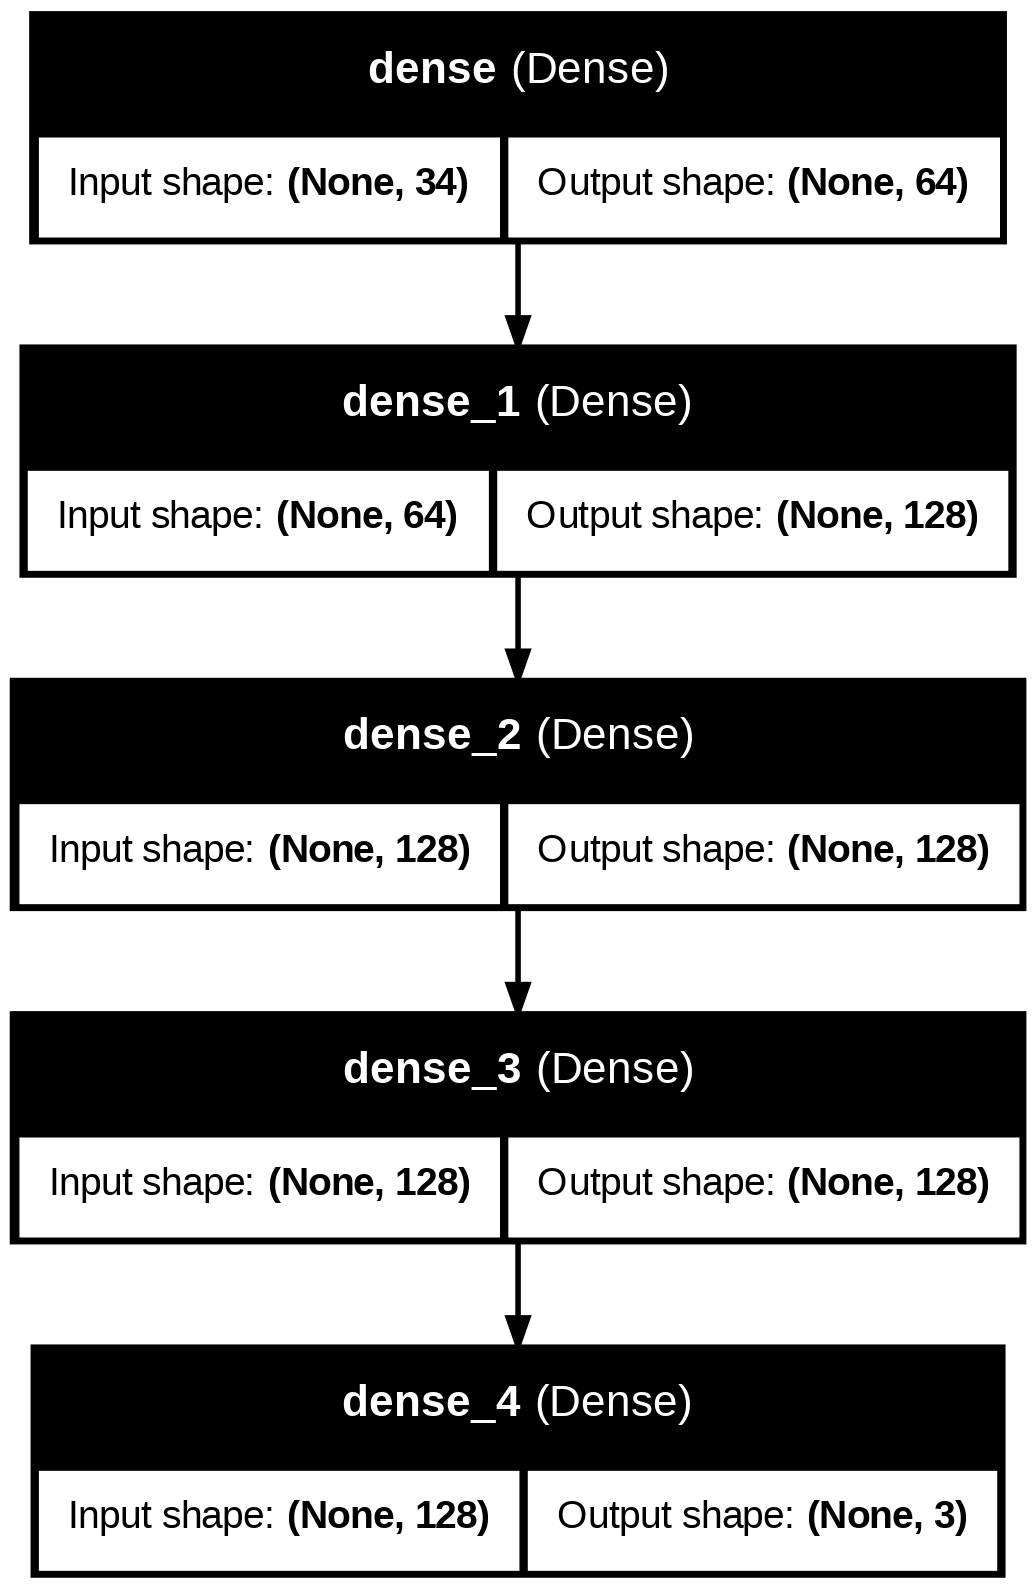

In [70]:
!pip install pydot
!pip install graphviz
import tensorflow as tf

tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

svm

In [71]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    print(f"Training Accuracy {name}: {train_accuracy:.2f}")
    print(f"Test Accuracy {name}: {test_accuracy:.2f}")

svm = SVC(kernel='rbf', C=1.0, probability=False, random_state=42)
svm.fit(X_train_scaled, y_train)

evaluate_classification(svm, "SVM", X_train_scaled, X_test_scaled, y_train, y_test)


Training Accuracy SVM: 0.94
Test Accuracy SVM: 0.84


Financial sentiment analysis

In [72]:
import pandas as pd
from transformers import pipeline
import torch
from tqdm import tqdm

device = 0 if torch.cuda.is_available() else -1

df = df_c_n.copy()

df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace("_", " ").str.title()

sentiment_pipeline = pipeline("sentiment-analysis", model="yiyanghkust/finbert-tone", device=device)
def sentiment_to_score(sentiment_label, confidence_score):
    """
    Map sentiment label to a numerical score and adjust with confidence score.
    """
    sentiment_mapping = {
        "POSITIVE": 1,
        "NEGATIVE": -1,
        "NEUTRAL": 0
    }

    sentiment_score = sentiment_mapping.get(sentiment_label.upper(), 0)

    adjusted_score = sentiment_score * confidence_score
    return adjusted_score

def analyze_batch(batch):
    try:
        results = sentiment_pipeline(batch)
        labels = [result['label'] for result in results]
        scores = [result['score'] for result in results]

        advanced_scores = [sentiment_to_score(label, score) for label, score in zip(labels, scores)]

        return labels, scores, advanced_scores
    except Exception as e:
        return ["NEUTRAL"] * len(batch), [0.5] * len(batch), [0.0] * len(batch)

batch_size = 32

sentiment_labels = []
sentiment_scores = []
advanced_sentiment_scores = []

for i in tqdm(range(0, len(df), batch_size), desc="Processing Batches"):
    batch_texts = df['Payment_Behaviour'][i:i + batch_size].tolist()
    labels, scores, advanced_scores = analyze_batch(batch_texts)

    sentiment_labels.extend(labels)
    sentiment_scores.extend(scores)
    advanced_sentiment_scores.extend(advanced_scores)

df['Sentiment_Label'] = sentiment_labels
df['Confidence_Score'] = sentiment_scores
df['Sentiment_Score'] = advanced_sentiment_scores

df.to_csv('dataset_with_finbert_advanced_sentiment.csv', index=False)

print("\nSentiment analysis completed and saved as 'dataset_with_finbert_advanced_sentiment.csv'")
print(df[['Payment_Behaviour', 'Sentiment_Label', 'Confidence_Score', 'Sentiment_Score']].head())


config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

Device set to use cuda:0
Processing Batches: 100%|██████████| 1803/1803 [07:59<00:00,  3.76it/s]



Sentiment analysis completed and saved as 'dataset_with_finbert_advanced_sentiment.csv'
                  Payment_Behaviour Sentiment_Label  Confidence_Score  \
0   High Spent Small Value Payments        Positive          0.962213   
1    Low Spent Large Value Payments        Negative          0.999571   
3    Low Spent Small Value Payments        Negative          0.906154   
4  High Spent Medium Value Payments         Neutral          0.637165   
5   High Spent Large Value Payments        Positive          0.994765   

   Sentiment_Score  
0         0.962213  
1        -0.999571  
3        -0.906154  
4         0.000000  
5         0.994765  


credit score calculation


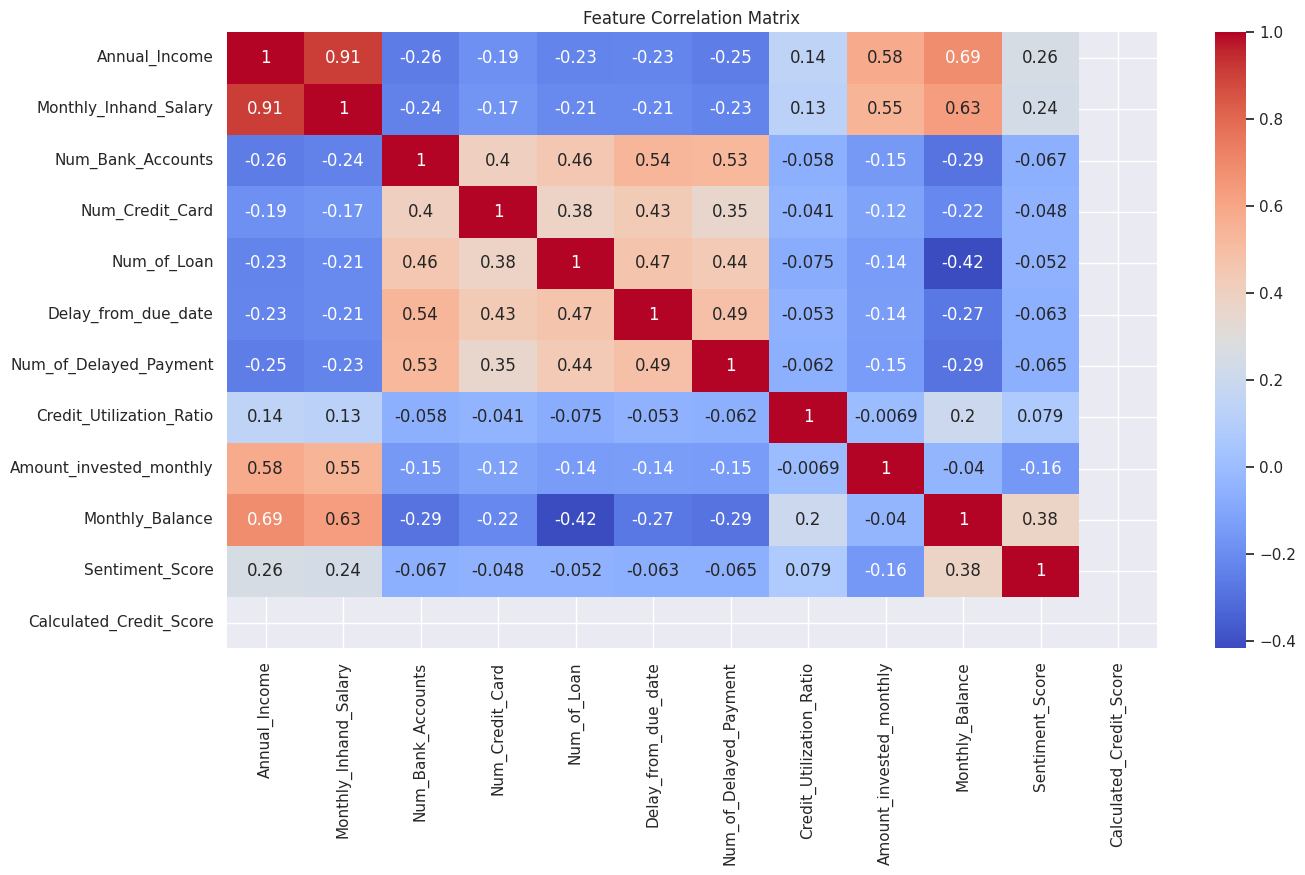

Linear Regression Weights:
 Annual_Income               0.090909
Monthly_Inhand_Salary       0.090909
Num_Bank_Accounts           0.090909
Num_Credit_Card             0.090909
Num_of_Loan                 0.090909
Delay_from_due_date         0.090909
Num_of_Delayed_Payment      0.090909
Credit_Utilization_Ratio    0.090909
Amount_invested_monthly     0.090909
Monthly_Balance             0.090909
Sentiment_Score             0.090909
dtype: float64
Linear Regression RMSE: 1.0550515456975948e-16
Linear Regression R^2: 1.0
Random Forest Feature Importances:
 Annual_Income               0.165877
Monthly_Inhand_Salary       0.049939
Num_Bank_Accounts           0.052041
Num_Credit_Card             0.002808
Num_of_Loan                 0.019114
Delay_from_due_date         0.210363
Num_of_Delayed_Payment      0.074536
Credit_Utilization_Ratio    0.072645
Amount_invested_monthly     0.006893
Monthly_Balance             0.003005
Sentiment_Score             0.342780
dtype: float64
Random Forest RMSE

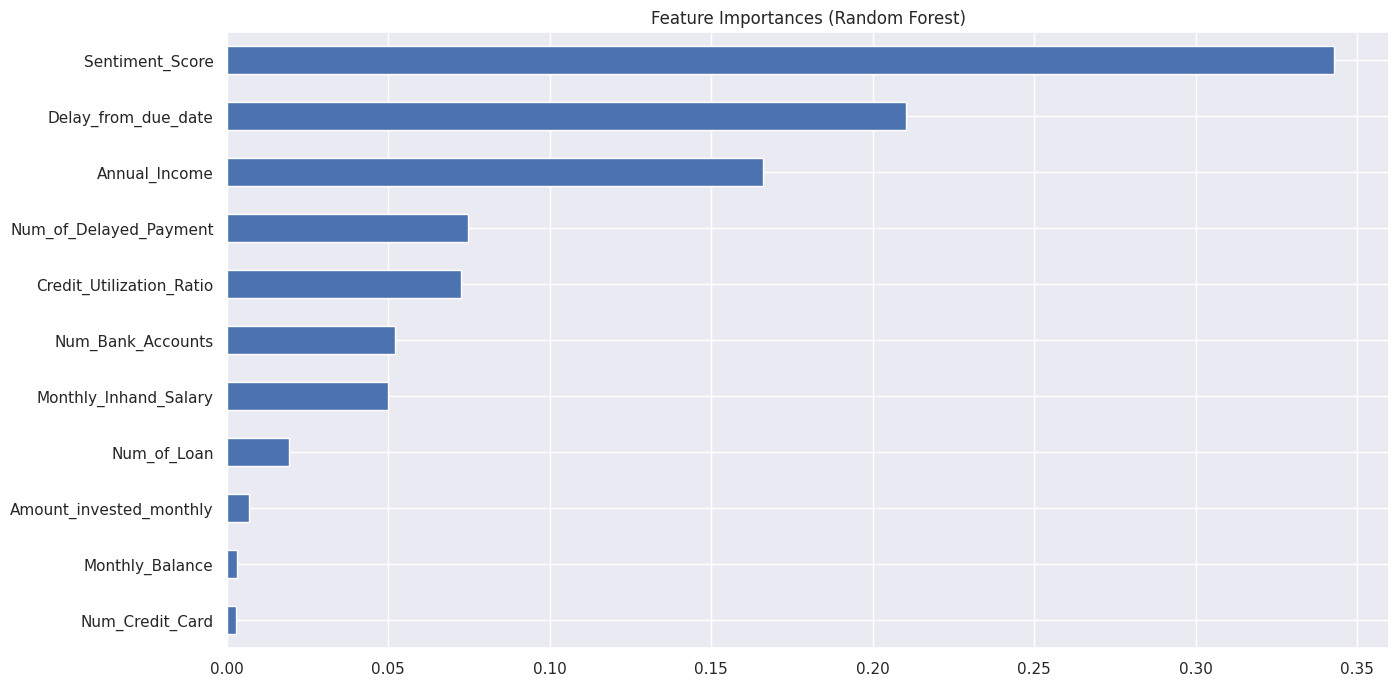

Refined Weights:
 Annual_Income               0.165877
Monthly_Inhand_Salary       0.049939
Num_Bank_Accounts           0.052041
Num_Credit_Card             0.002808
Num_of_Loan                 0.019114
Delay_from_due_date         0.210363
Num_of_Delayed_Payment      0.074536
Credit_Utilization_Ratio    0.072645
Amount_invested_monthly     0.006893
Monthly_Balance             0.003005
Sentiment_Score             0.342780
dtype: float64
   Calculated_Credit_Score Credit_Score_Category
0               597.595305                  Poor
1               359.982934                  Poor
2               366.432823                  Poor
3               487.088969                  Poor
4               612.228265                  Poor
Updated dataset with credit scores saved to 'updated_credit_scores.csv'.


In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('dataset_with_finbert_advanced_sentiment.csv')
target = "Calculated_Credit_Score"
features = [
    "Annual_Income",
    "Monthly_Inhand_Salary",
    "Num_Bank_Accounts",
    "Num_Credit_Card",
    "Num_of_Loan",
    "Delay_from_due_date",
    "Num_of_Delayed_Payment",
    "Credit_Utilization_Ratio",
    "Amount_invested_monthly",
    "Monthly_Balance",
    "Sentiment_Score"
]

data = data.dropna(subset=features)

for column in features:
    data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())

X = data[features]
y = data[features].mean(axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

data['Calculated_Credit_Score'] = 0

correlation_matrix = data[features + [target]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

linear_weights = pd.Series(lin_reg.coef_, index=features)
print("Linear Regression Weights:\n", linear_weights)

y_pred_lr = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
print("Linear Regression RMSE:", rmse)
print("Linear Regression R^2:", r2_score(y_test, y_pred_lr))

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

rf_importances = pd.Series(rf_model.feature_importances_, index=features)
print("Random Forest Feature Importances:\n", rf_importances)

y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print("Random Forest RMSE:", rmse_rf)
print("Random Forest R^2:", r2_score(y_test, y_pred_rf))

rf_importances.sort_values().plot(kind="barh", title="Feature Importances (Random Forest)")
plt.show()

refined_weights = rf_importances / rf_importances.sum()
print("Refined Weights:\n", refined_weights)

data["Calculated_Credit_Score"] = sum(data[column] * refined_weights[column] for column in features)

data["Calculated_Credit_Score"] = (
    300 + (data["Calculated_Credit_Score"] - data["Calculated_Credit_Score"].min())
    / (data["Calculated_Credit_Score"].max() - data["Calculated_Credit_Score"].min()) * 550
)

def classify_credit_score(score):
    if score >= 750:
        return "Excellent"
    elif score >= 700:
        return "Good"
    elif score >= 650:
        return "Fair"
    else:
        return "Poor"

data["Credit_Score_Category"] = data["Calculated_Credit_Score"].apply(classify_credit_score)

data.to_csv('updated_credit_scores.csv', index=False)
print(data[["Calculated_Credit_Score", "Credit_Score_Category"]].head())

print("Updated dataset with credit scores saved to 'updated_credit_scores.csv'.")

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
file_path = 'updated_credit_scores.csv'
data = pd.read_csv(file_path)
data['Bankruptcy_Risk'] = data['Credit_Score_Category'].apply(lambda x: 1 if x == 'Poor' else 0)
features = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
            'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
            'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
            'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
X = data[features]
y = data['Bankruptcy_Risk']
X.fillna(X.mean(), inplace=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)

test_file_path = 'test.csv'
test_data = pd.read_csv(test_file_path)

X_test_new = test_data[features]
print(X_test_new.dtypes)

for col in features:
    X_test_new[col] = pd.to_numeric(X_test_new[col], errors='coerce')

X_test_new.fillna(X_test_new.mean(), inplace=True)
X_test_new_scaled = scaler.transform(X_test_new)
test_data['Bankruptcy_Prediction'] = model.predict(X_test_new_scaled)
test_data[['Bankruptcy_Prediction']].to_csv('bankruptcy_predictions.csv', index=False)

print("Predictions saved to 'bankruptcy_predictions.csv'")


Model Accuracy: 0.7770972960480702
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.45      0.54      4994
           1       0.80      0.91      0.85     12314

    accuracy                           0.78     17308
   macro avg       0.74      0.68      0.70     17308
weighted avg       0.76      0.78      0.76     17308

Age                          object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Total_EMI_per_month         float64
Amount_invested_monthly      object
Monthly_Balance              object
dtype: object
Predictions saved to 'bankruptcy_predictions.csv'
